In [1]:
pip install pandas numpy matplotlib seaborn scipy plotly

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# Test des imports
try:
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    print("✅ Toutes les librairies sont installées !")
    print(f"Pandas version: {pd.__version__}")
    print(f"NumPy version: {np.__version__}")
except ImportError as e:
    print(f"❌ Erreur d'import: {e}")

✅ Toutes les librairies sont installées !
Pandas version: 2.3.1
NumPy version: 2.3.2


In [3]:
# =============================================================================
# 1. INSTALLATION ET IMPORT DES LIBRAIRIES
# =============================================================================

# Installation des librairies supplémentaires si nécessaire
# Dans le terminal VSCode ou dans une cellule Jupyter :
# pip install pandas numpy matplotlib seaborn plotly scipy
# ou si vous utilisez conda :
# conda install pandas numpy matplotlib seaborn plotly scipy

# Librairies de base pour l'analyse de données
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Librairies pour les graphiques interactifs (optionnel)
try:
    import plotly.express as px
    import plotly.graph_objects as go
    from plotly.subplots import make_subplots
    PLOTLY_AVAILABLE = True
    print("✓ Plotly disponible pour les graphiques interactifs")
except ImportError:
    PLOTLY_AVAILABLE = False
    print("⚠ Plotly non disponible - utilisation de matplotlib uniquement")

# Configuration des graphiques
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

print("✓ Toutes les librairies sont chargées avec succès!")

✓ Plotly disponible pour les graphiques interactifs
✓ Toutes les librairies sont chargées avec succès!


In [4]:
# =============================================================================
# DÉFINITION DES CHEMINS VERS LES FICHIERS CSV
# =============================================================================

# Chemin vers le premier fichier CSV (réglage actuel)
csv_file_1 = './2-apres/thickness_ENG.csv'

# Chemin vers le deuxième fichier CSV (nouveau réglage à comparer)
csv_file_2 = './10-restart apres modif recette a la main/thickness.csv'  # Remplacez par le nom de votre 2ème fichier

print(f"📁 Fichier 1 (réglage actuel): 1-avant de relancer une optimisation/thickness_ENG.csv")
print(f"📁 Fichier 2 (nouveau réglage): 2-apres/thickness_ENG.csv")

# Vérification que les fichiers existent
import os

if os.path.exists(csv_file_1):
    print(f"✅ {csv_file_1} trouvé")
else:
    print(f"❌ {csv_file_1} non trouvé")

if os.path.exists(csv_file_2):
    print(f"✅ {csv_file_2} trouvé")
else:
    print(f"❌ {csv_file_2} non trouvé - Vous pourrez l'ajouter plus tard")

📁 Fichier 1 (réglage actuel): 1-avant de relancer une optimisation/thickness_ENG.csv
📁 Fichier 2 (nouveau réglage): 2-apres/thickness_ENG.csv
✅ ./2-apres/thickness_ENG.csv trouvé
✅ ./10-restart apres modif recette a la main/thickness.csv trouvé


📂 Chargement des données...
✅ Avant: 32767 points sur 27.5 min
✅ Après: 32767 points sur 30.9 min

📊 STATISTIQUES TRSF_ThicknessBottlePerc
Métrique             Avant      Après      Différence  
--------------------------------------------------
Moyenne              82.9       72.2       -10.7       
Médiane              83.0       71.0       -12.0       
Écart-type           3.6        8.0        +4.4        
Minimum              71.0       56.0       -15.0       
Maximum              91.0       88.0       -3.0        
Temps à 100%         0.0        0.0        +0.0        

📈 Création des graphiques...


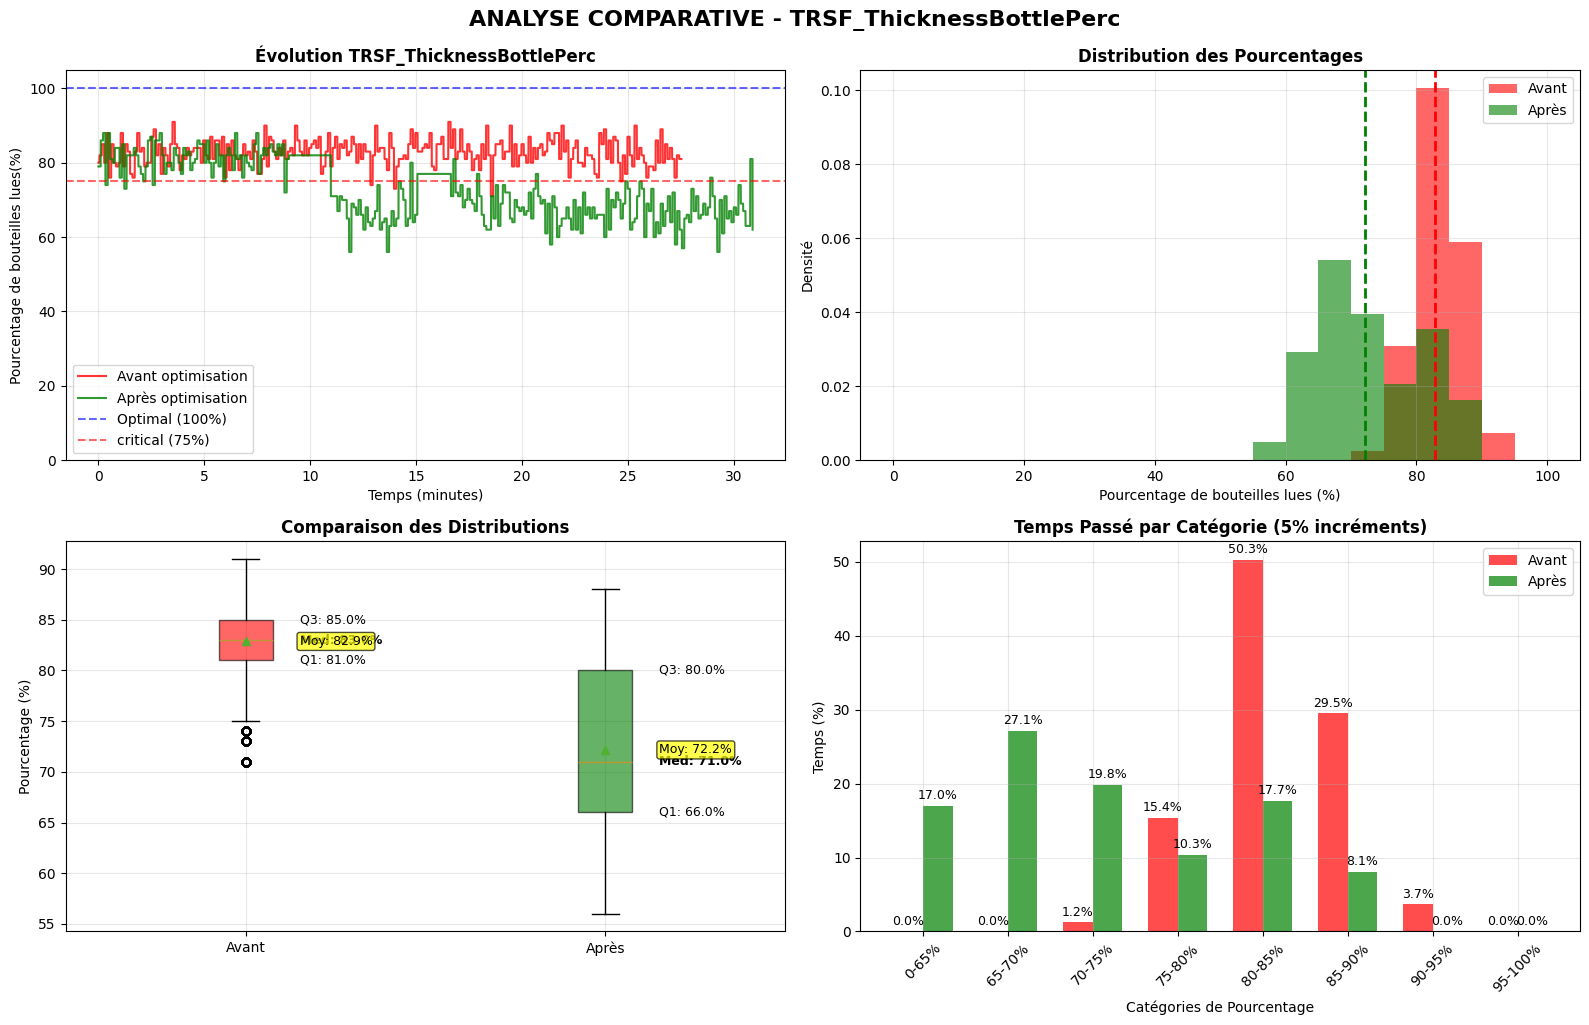


🎯 RÉSUMÉ EXÉCUTIF
📈 Amélioration moyenne: -10.71 points
📊 Amélioration stabilité: -4.43 points d'écart-type
🎯 Gain temps à 100%: +0.0 points
❌ L'optimisation a DÉGRADÉ les performances
❌ L'optimisation a DÉGRADÉ la stabilité

📋 Points clés:
   • % moyen avant: 82.9% → après: 72.2%
   • Stabilité avant: ±3.6% → après: ±8.0%
   • Temps optimal avant: 0.0% → après: 0.0%


In [5]:
# =============================================================================
# ANALYSE DIRECTE - TRSF_ThicknessBottlePerc
# Utilise les chemins csv_file_1 et csv_file_2 déjà définis
# =============================================================================

def extract_bottle_percentage(file_path):
    """
    Extrait uniquement les données de temps et pourcentage de bouteilles
    """
    with open(file_path, 'r', encoding='utf-8') as file:
        lines = file.readlines()
    
    # Trouve le début des données (après les lignes %)
    data_start = 0
    for i, line in enumerate(lines):
        if not line.startswith('%') and line.strip():
            data_start = i
            break
    
    times = []
    percentages = []
    
    for line in lines[data_start:]:
        if line.strip():
            values = [x.strip() for x in line.split(',') if x.strip()]
            if len(values) >= 12:
                try:
                    time_val = float(values[0]) / 60  # Temps en minutes
                    perc_val = float(values[-1])      # Dernière colonne = TRSF_ThicknessBottlePerc
                    times.append(time_val)
                    percentages.append(perc_val)
                except ValueError:
                    continue
    
    return np.array(times), np.array(percentages)

# Chargement des données des 2 fichiers
print("📂 Chargement des données...")
times_avant, perc_avant = extract_bottle_percentage(csv_file_1)
times_apres, perc_apres = extract_bottle_percentage(csv_file_2)

print(f"✅ Avant: {len(perc_avant)} points sur {times_avant.max():.1f} min")
print(f"✅ Après: {len(perc_apres)} points sur {times_apres.max():.1f} min")

# =============================================================================
# STATISTIQUES COMPARATIVES
# =============================================================================

print(f"\n📊 STATISTIQUES TRSF_ThicknessBottlePerc")
print("=" * 50)
print(f"{'Métrique':<20} {'Avant':<10} {'Après':<10} {'Différence':<12}")
print("-" * 50)

stats_avant = {
    'Moyenne': np.mean(perc_avant),
    'Médiane': np.median(perc_avant), 
    'Écart-type': np.std(perc_avant),
    'Minimum': np.min(perc_avant),
    'Maximum': np.max(perc_avant),
    'Temps à 100%': np.sum(perc_avant == 100) / len(perc_avant) * 100
}

stats_apres = {
    'Moyenne': np.mean(perc_apres),
    'Médiane': np.median(perc_apres),
    'Écart-type': np.std(perc_apres), 
    'Minimum': np.min(perc_apres),
    'Maximum': np.max(perc_apres),
    'Temps à 100%': np.sum(perc_apres == 100) / len(perc_apres) * 100
}

for metric in stats_avant.keys():
    avant = stats_avant[metric]
    apres = stats_apres[metric]
    diff = apres - avant
    print(f"{metric:<20} {avant:<10.1f} {apres:<10.1f} {diff:<+12.1f}")

# =============================================================================
# GRAPHIQUES COMPARATIFS
# =============================================================================

print(f"\n📈 Création des graphiques...")

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 10))

# 1. Évolution temporelle
ax1.plot(times_avant, perc_avant, 'r-', label='Avant optimisation', linewidth=1.5, alpha=0.8)
ax1.plot(times_apres, perc_apres, 'g-', label='Après optimisation', linewidth=1.5, alpha=0.8) 
ax1.axhline(y=100, color='blue', linestyle='--', alpha=0.6, label='Optimal (100%)')
ax1.axhline(y=75, color='red', linestyle='--', alpha=0.6, label='critical (75%)')
ax1.set_title('Évolution TRSF_ThicknessBottlePerc', fontweight='bold', fontsize=12)
ax1.set_xlabel('Temps (minutes)')
ax1.set_ylabel('Pourcentage de bouteilles lues(%)')
ax1.legend()
ax1.grid(True, alpha=0.3)
ax1.set_ylim(0, 105)

# 2. Histogrammes comparatifs
bins = np.linspace(0, 100, 21)
ax2.hist(perc_avant, bins=bins, alpha=0.6, color='red', label='Avant', density=True)
ax2.hist(perc_apres, bins=bins, alpha=0.6, color='green', label='Après', density=True)
ax2.axvline(np.mean(perc_avant), color='red', linestyle='--', linewidth=2)
ax2.axvline(np.mean(perc_apres), color='green', linestyle='--', linewidth=2)
ax2.set_title('Distribution des Pourcentages', fontweight='bold', fontsize=12)
ax2.set_xlabel('Pourcentage de bouteilles lues (%)')
ax2.set_ylabel('Densité')
ax2.legend()
ax2.grid(True, alpha=0.3)

# 3. Box plots avec affichage des quartiles
box_data = [perc_avant, perc_apres]
bp = ax3.boxplot(box_data, labels=['Avant', 'Après'], patch_artist=True, showmeans=True)

# Couleurs des boîtes
bp['boxes'][0].set_facecolor('red')
bp['boxes'][0].set_alpha(0.6)
bp['boxes'][1].set_facecolor('green')
bp['boxes'][1].set_alpha(0.6)

# Ajout des valeurs des quartiles sur le graphique
for i, data in enumerate(box_data):
    q1 = np.percentile(data, 25)
    q2 = np.percentile(data, 50)  # médiane
    q3 = np.percentile(data, 75)
    mean_val = np.mean(data)
    
    # Position x pour les annotations
    x_pos = i + 1
    
    # Annotations des quartiles
    ax3.text(x_pos + 0.15, q1, f'Q1: {q1:.1f}%', fontsize=9, va='center', ha='left')
    ax3.text(x_pos + 0.15, q2, f'Med: {q2:.1f}%', fontsize=9, va='center', ha='left', fontweight='bold')
    ax3.text(x_pos + 0.15, q3, f'Q3: {q3:.1f}%', fontsize=9, va='center', ha='left')
    ax3.text(x_pos + 0.15, mean_val, f'Moy: {mean_val:.1f}%', fontsize=9, va='center', ha='left', 
             bbox=dict(boxstyle="round,pad=0.2", facecolor="yellow", alpha=0.7))

ax3.set_title('Comparaison des Distributions', fontweight='bold', fontsize=12)
ax3.set_ylabel('Pourcentage (%)')
ax3.grid(True, alpha=0.3)

# 4. Barres comparatives par catégories (incréments de 5%)
categories = ['0-65%', '65-70%', '70-75%', '75-80%', '80-85%', '85-90%', '90-95%', '95-100%']

def calc_time_in_categories(data):
    return [
        np.sum(data < 65) / len(data) * 100,
        np.sum((data >= 65) & (data < 70)) / len(data) * 100,
        np.sum((data >= 70) & (data < 75)) / len(data) * 100,
        np.sum((data >= 75) & (data < 80)) / len(data) * 100,
        np.sum((data >= 80) & (data < 85)) / len(data) * 100,
        np.sum((data >= 85) & (data < 90)) / len(data) * 100,
        np.sum((data >= 90) & (data < 95)) / len(data) * 100,
        np.sum(data >= 95) / len(data) * 100  # 95-100% (inclut 100%)
    ]

time_avant_cat = calc_time_in_categories(perc_avant)
time_apres_cat = calc_time_in_categories(perc_apres)

x = np.arange(len(categories))
width = 0.35

bars1 = ax4.bar(x - width/2, time_avant_cat, width, label='Avant', color='red', alpha=0.7)
bars2 = ax4.bar(x + width/2, time_apres_cat, width, label='Après', color='green', alpha=0.7)

ax4.set_title('Temps Passé par Catégorie (5% incréments)', fontweight='bold', fontsize=12)
ax4.set_xlabel('Catégories de Pourcentage')
ax4.set_ylabel('Temps (%)')
ax4.set_xticks(x)
ax4.set_xticklabels(categories, rotation=45)  # Rotation pour meilleure lisibilité
ax4.legend()
ax4.grid(True, alpha=0.3)

# Ajout des valeurs sur les barres
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax4.text(bar.get_x() + bar.get_width()/2., height + 0.5,
                f'{height:.1f}%', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.suptitle('ANALYSE COMPARATIVE - TRSF_ThicknessBottlePerc', fontsize=16, fontweight='bold', y=1.02)
plt.show()

# =============================================================================
# RÉSUMÉ EXÉCUTIF
# =============================================================================

amelioration = np.mean(perc_apres) - np.mean(perc_avant)
amelioration_stabilite = np.std(perc_avant) - np.std(perc_apres)
gain_temps_100 = stats_apres['Temps à 100%'] - stats_avant['Temps à 100%']

print(f"\n🎯 RÉSUMÉ EXÉCUTIF")
print("=" * 40)
print(f"📈 Amélioration moyenne: {amelioration:+.2f} points")
print(f"📊 Amélioration stabilité: {amelioration_stabilite:+.2f} points d'écart-type")
print(f"🎯 Gain temps à 100%: {gain_temps_100:+.1f} points")

if amelioration > 0:
    print(f"✅ L'optimisation a AMÉLIORÉ les performances")
else:
    print(f"❌ L'optimisation a DÉGRADÉ les performances")

if amelioration_stabilite > 0:
    print(f"✅ L'optimisation a AMÉLIORÉ la stabilité")
else:
    print(f"❌ L'optimisation a DÉGRADÉ la stabilité")

print(f"\n📋 Points clés:")
print(f"   • % moyen avant: {np.mean(perc_avant):.1f}% → après: {np.mean(perc_apres):.1f}%")
print(f"   • Stabilité avant: ±{np.std(perc_avant):.1f}% → après: ±{np.std(perc_apres):.1f}%")
print(f"   • Temps optimal avant: {stats_avant['Temps à 100%']:.1f}% → après: {stats_apres['Temps à 100%']:.1f}%")

📂 Chargement des données TRSF_ThicknessBottles[1]...
✅ Avant: 32767 points sur 27.5 min
✅ Après: 32767 points sur 30.9 min

📊 STATISTIQUES TRSF_ThicknessBottles[1] (Capteur 1)
Métrique             Avant        Après        Différence  
------------------------------------------------------------
Moyenne              89.207       100.000      +10.793     
Médiane              90.000       100.000      +10.000     
Écart-type           6.828        0.000        -6.828      
Minimum              60.000       100.000      +40.000     
Maximum              100.000      100.000      +0.000      
Plage                40.000       0.000        -40.000     
CV (%)               7.65         0.00         -7.65       

📈 Création des graphiques pour le Capteur 1...


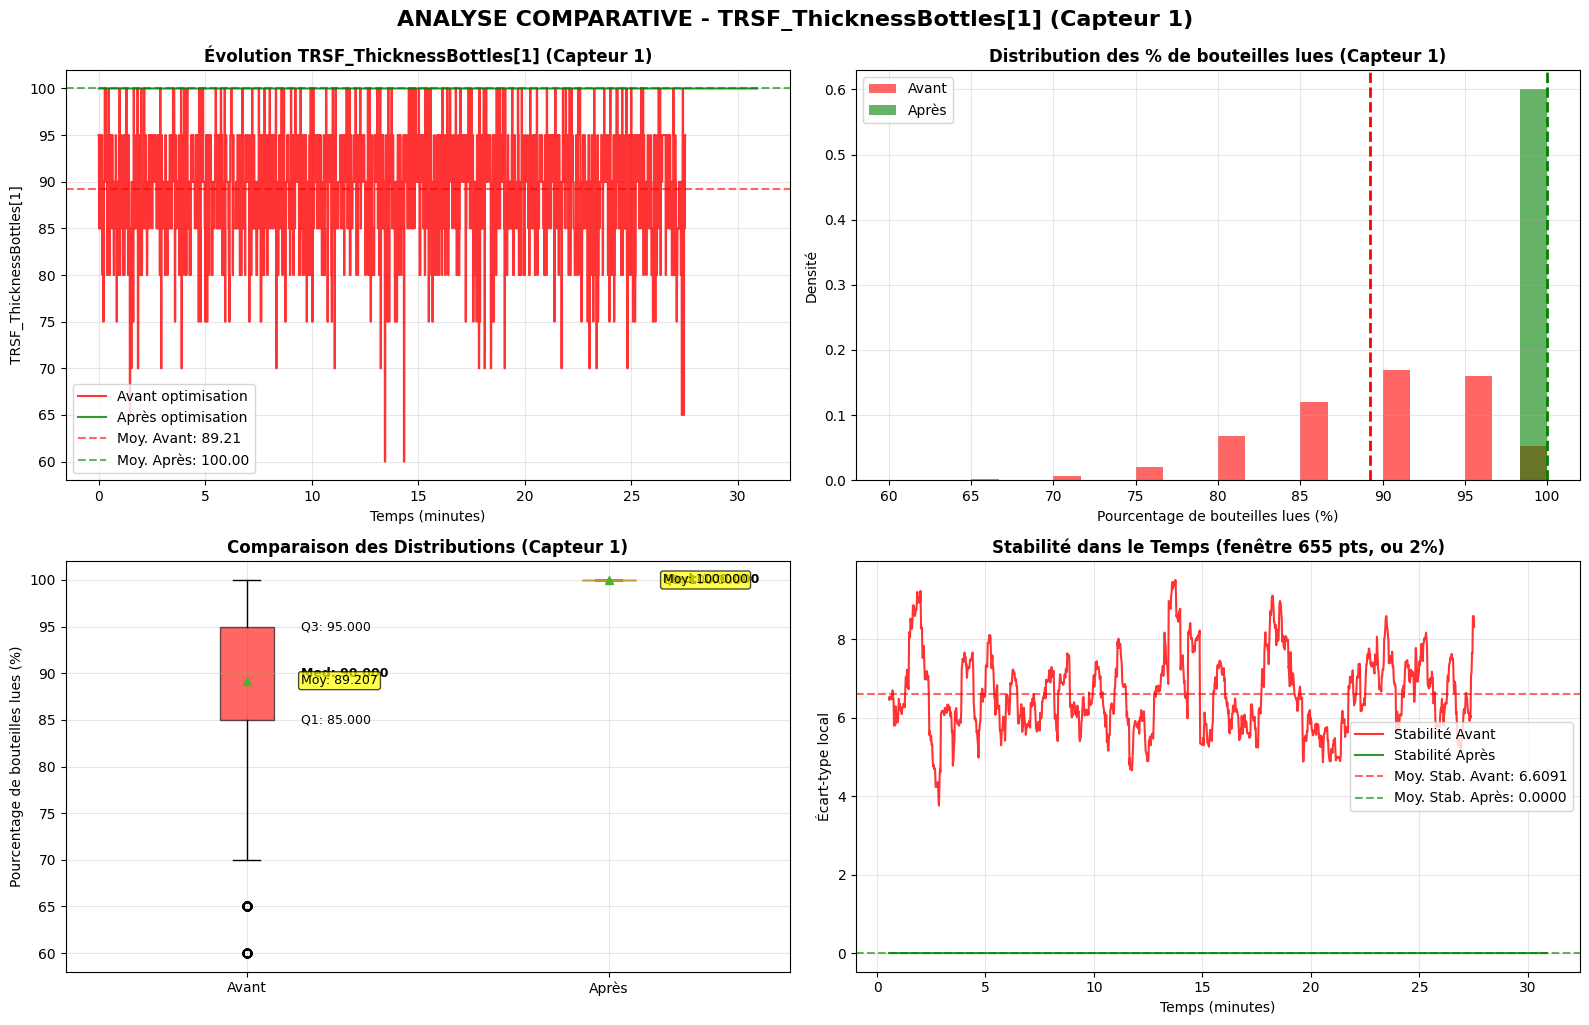


🎯 RÉSUMÉ EXÉCUTIF - CAPTEUR 1
📈 Variation moyenne: +10.7932 %
📊 Amélioration stabilité: +6.8275 unités d'écart-type
📉 Réduction variabilité: +7.65 points de CV
✅ AMÉLIORATION: Augmentation du pourcentage bouteilles mesurées moyen
✅ STABILITÉ AMÉLIORÉE: Moins de variations

📋 Points clés:
   • Pourcentage bouteilles mesurées moyen: 89.2068 → 100.0000
   • Stabilité (σ): ±6.8275 → ±0.0000
   • Variabilité (CV): 7.65% → 0.00%
   • Plage (écarts entre les extremes): 40.0000 → 0.0000


In [6]:
# =============================================================================
# ANALYSE COMPARATIVE - TRSF_ThicknessBottles[1] (Capteur 1)
# Utilise les chemins csv_file_1 et csv_file_2 déjà définis
# =============================================================================

# Import nécessaire
import numpy as np
import matplotlib.pyplot as plt

def extract_thickness_sensor1(file_path):
    """
    Extrait les données de temps et d'épaisseur du capteur 1
    """
    with open(file_path, 'r', encoding='utf-8') as file:
        lines = file.readlines()
    
    # Trouve le début des données (après les lignes %)
    data_start = 0
    for i, line in enumerate(lines):
        if not line.startswith('%') and line.strip():
            data_start = i
            break
    
    times = []
    thickness_values = []
    
    for line in lines[data_start:]:
        if line.strip():
            values = [x.strip() for x in line.split(',') if x.strip()]
            if len(values) >= 2:  # Au moins temps + épaisseur capteur 1
                try:
                    time_val = float(values[0]) / 60  # Temps en minutes
                    thickness_val = float(values[1])  # 2ème colonne = TRSF_ThicknessBottles[1]
                    times.append(time_val)
                    thickness_values.append(thickness_val)
                except ValueError:
                    continue
    
    return np.array(times), np.array(thickness_values)

# Chargement des données des 2 fichiers
print("📂 Chargement des données TRSF_ThicknessBottles[1]...")
times_avant, thick_avant = extract_thickness_sensor1(csv_file_1)
times_apres, thick_apres = extract_thickness_sensor1(csv_file_2)

print(f"✅ Avant: {len(thick_avant)} points sur {times_avant.max():.1f} min")
print(f"✅ Après: {len(thick_apres)} points sur {times_apres.max():.1f} min")

# =============================================================================
# STATISTIQUES COMPARATIVES
# =============================================================================

print(f"\n📊 STATISTIQUES TRSF_ThicknessBottles[1] (Capteur 1)")
print("=" * 60)
print(f"{'Métrique':<20} {'Avant':<12} {'Après':<12} {'Différence':<12}")
print("-" * 60)

stats_avant = {
    'Moyenne': np.mean(thick_avant),
    'Médiane': np.median(thick_avant), 
    'Écart-type': np.std(thick_avant),
    'Minimum': np.min(thick_avant),
    'Maximum': np.max(thick_avant),
    'Plage': np.max(thick_avant) - np.min(thick_avant),
    'CV (%)': (np.std(thick_avant) / np.mean(thick_avant)) * 100  # Coefficient de variation
}

stats_apres = {
    'Moyenne': np.mean(thick_apres),
    'Médiane': np.median(thick_apres),
    'Écart-type': np.std(thick_apres), 
    'Minimum': np.min(thick_apres),
    'Maximum': np.max(thick_apres),
    'Plage': np.max(thick_apres) - np.min(thick_apres),
    'CV (%)': (np.std(thick_apres) / np.mean(thick_apres)) * 100
}

for metric in stats_avant.keys():
    avant = stats_avant[metric]
    apres = stats_apres[metric]
    diff = apres - avant
    if metric == 'CV (%)':
        print(f"{metric:<20} {avant:<12.2f} {apres:<12.2f} {diff:<+12.2f}")
    else:
        print(f"{metric:<20} {avant:<12.3f} {apres:<12.3f} {diff:<+12.3f}")

# =============================================================================
# GRAPHIQUES COMPARATIFS
# =============================================================================

print(f"\n📈 Création des graphiques pour le Capteur 1...")

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 10))

# 1. Évolution temporelle
ax1.plot(times_avant, thick_avant, 'r-', label='Avant optimisation', linewidth=1.5, alpha=0.8)
ax1.plot(times_apres, thick_apres, 'g-', label='Après optimisation', linewidth=1.5, alpha=0.8) 

# Lignes de référence (moyennes)
ax1.axhline(y=np.mean(thick_avant), color='red', linestyle='--', alpha=0.6, 
           label=f'Moy. Avant: {np.mean(thick_avant):.2f}')
ax1.axhline(y=np.mean(thick_apres), color='green', linestyle='--', alpha=0.6,
           label=f'Moy. Après: {np.mean(thick_apres):.2f}')

ax1.set_title('Évolution TRSF_ThicknessBottles[1] (Capteur 1)', fontweight='bold', fontsize=12)
ax1.set_xlabel('Temps (minutes)')
ax1.set_ylabel('TRSF_ThicknessBottles[1]')
ax1.legend()
ax1.grid(True, alpha=0.3)

# 2. Histogrammes comparatifs
bins = np.linspace(min(np.min(thick_avant), np.min(thick_apres)), 
                   max(np.max(thick_avant), np.max(thick_apres)), 25)
ax2.hist(thick_avant, bins=bins, alpha=0.6, color='red', label='Avant', density=True)
ax2.hist(thick_apres, bins=bins, alpha=0.6, color='green', label='Après', density=True)
ax2.axvline(np.mean(thick_avant), color='red', linestyle='--', linewidth=2)
ax2.axvline(np.mean(thick_apres), color='green', linestyle='--', linewidth=2)
ax2.set_title('Distribution des % de bouteilles lues (Capteur 1)', fontweight='bold', fontsize=12)
ax2.set_xlabel('Pourcentage de bouteilles lues (%)')
ax2.set_ylabel('Densité')
ax2.legend()
ax2.grid(True, alpha=0.3)

# 3. Box plots avec quartiles
box_data = [thick_avant, thick_apres]
bp = ax3.boxplot(box_data, labels=['Avant', 'Après'], patch_artist=True, showmeans=True)

# Couleurs des boîtes
bp['boxes'][0].set_facecolor('red')
bp['boxes'][0].set_alpha(0.6)
bp['boxes'][1].set_facecolor('green')
bp['boxes'][1].set_alpha(0.6)

# Ajout des valeurs des quartiles
for i, data in enumerate(box_data):
    q1 = np.percentile(data, 25)
    q2 = np.percentile(data, 50)  # médiane
    q3 = np.percentile(data, 75)
    mean_val = np.mean(data)
    
    x_pos = i + 1
    
    # Annotations des quartiles
    ax3.text(x_pos + 0.15, q1, f'Q1: {q1:.3f}', fontsize=9, va='center', ha='left')
    ax3.text(x_pos + 0.15, q2, f'Med: {q2:.3f}', fontsize=9, va='center', ha='left', fontweight='bold')
    ax3.text(x_pos + 0.15, q3, f'Q3: {q3:.3f}', fontsize=9, va='center', ha='left')
    ax3.text(x_pos + 0.15, mean_val, f'Moy: {mean_val:.3f}', fontsize=9, va='center', ha='left', 
             bbox=dict(boxstyle="round,pad=0.2", facecolor="yellow", alpha=0.7))

ax3.set_title('Comparaison des Distributions (Capteur 1)', fontweight='bold', fontsize=12)
ax3.set_ylabel('Pourcentage de bouteilles lues (%)')
ax3.grid(True, alpha=0.3)

# 4. Analyse de la variabilité dans le temps (fenêtres glissantes)
window_size = max(10, len(thick_avant) // 50)  # Fenêtre adaptative

def rolling_std(data, window):
    """Calcule l'écart-type sur fenêtre glissante"""
    rolling_stds = []
    for i in range(len(data) - window + 1):
        rolling_stds.append(np.std(data[i:i+window]))
    return np.array(rolling_stds)

if len(thick_avant) > window_size and len(thick_apres) > window_size:
    std_avant = rolling_std(thick_avant, window_size)
    std_apres = rolling_std(thick_apres, window_size)
    
    time_window_avant = times_avant[window_size-1:]
    time_window_apres = times_apres[window_size-1:]
    
    ax4.plot(time_window_avant, std_avant, 'r-', label='Stabilité Avant', linewidth=1.5, alpha=0.8)
    ax4.plot(time_window_apres, std_apres, 'g-', label='Stabilité Après', linewidth=1.5, alpha=0.8)
    
    ax4.axhline(y=np.mean(std_avant), color='red', linestyle='--', alpha=0.6,
               label=f'Moy. Stab. Avant: {np.mean(std_avant):.4f}')
    ax4.axhline(y=np.mean(std_apres), color='green', linestyle='--', alpha=0.6,
               label=f'Moy. Stab. Après: {np.mean(std_apres):.4f}')
    
    ax4.set_title(f'Stabilité dans le Temps (fenêtre {window_size} pts, ou 2%)', fontweight='bold', fontsize=12)
    ax4.set_xlabel('Temps (minutes)')
    ax4.set_ylabel('Écart-type local')
    ax4.legend()
else:
    ax4.text(0.5, 0.5, 'Pas assez de données\npour l\'analyse de stabilité', 
            transform=ax4.transAxes, ha='center', va='center', fontsize=12)
    ax4.set_title('Analyse de Stabilité')

ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.suptitle('ANALYSE COMPARATIVE - TRSF_ThicknessBottles[1] (Capteur 1)', 
             fontsize=16, fontweight='bold', y=1.02)
plt.show()

# =============================================================================
# RÉSUMÉ EXÉCUTIF
# =============================================================================

amelioration_moyenne = np.mean(thick_apres) - np.mean(thick_avant)
amelioration_stabilite = np.std(thick_avant) - np.std(thick_apres)  # Réduction = amélioration
amelioration_cv = stats_avant['CV (%)'] - stats_apres['CV (%)']  # Réduction = amélioration

print(f"\n🎯 RÉSUMÉ EXÉCUTIF - CAPTEUR 1")
print("=" * 50)
print(f"📈 Variation moyenne: {amelioration_moyenne:+.4f} %")
print(f"📊 Amélioration stabilité: {amelioration_stabilite:+.4f} unités d'écart-type")
print(f"📉 Réduction variabilité: {amelioration_cv:+.2f} points de CV")

if abs(amelioration_moyenne) < 0.5:  # Seuil de significativité
    print(f"➡️ STABILITÉ: Pas de changement significatif de la moyenne")
else:
    if amelioration_moyenne > 0:
        print(f"✅ AMÉLIORATION: Augmentation du pourcentage bouteilles mesurées moyen")
    else:
        print(f"❌ DÉGRADATION: Diminution du pourcentage bouteilles mesurées moyen")

if amelioration_stabilite > 0:
    print(f"✅ STABILITÉ AMÉLIORÉE: Moins de variations")
else:
    print(f"❌ STABILITÉ DÉGRADÉE: Plus de variations")

print(f"\n📋 Points clés:")
print(f"   • Pourcentage bouteilles mesurées moyen: {np.mean(thick_avant):.4f} → {np.mean(thick_apres):.4f}")
print(f"   • Stabilité (σ): ±{np.std(thick_avant):.4f} → ±{np.std(thick_apres):.4f}")
print(f"   • Variabilité (CV): {stats_avant['CV (%)']:.2f}% → {stats_apres['CV (%)']:.2f}%")
print(f"   • Plage (écarts entre les extremes): {stats_avant['Plage']:.4f} → {stats_apres['Plage']:.4f}")

📂 Chargement des données TRSF_ThicknessBottles[2]...
✅ Avant: 32767 points sur 27.5 min
✅ Après: 32767 points sur 30.9 min

📊 STATISTIQUES TRSF_ThicknessBottles[2] (Capteur 2)
Métrique             Avant        Après        Différence  
------------------------------------------------------------
Moyenne              98.482       87.839       -10.644     
Médiane              100.000      90.000       -10.000     
Écart-type           2.777        7.444        +4.667      
Minimum              85.000       60.000       -25.000     
Maximum              100.000      100.000      +0.000      
Plage                15.000       40.000       +25.000     
CV (%)               2.82         8.47         +5.66       

📈 Création des graphiques pour le Capteur 2...


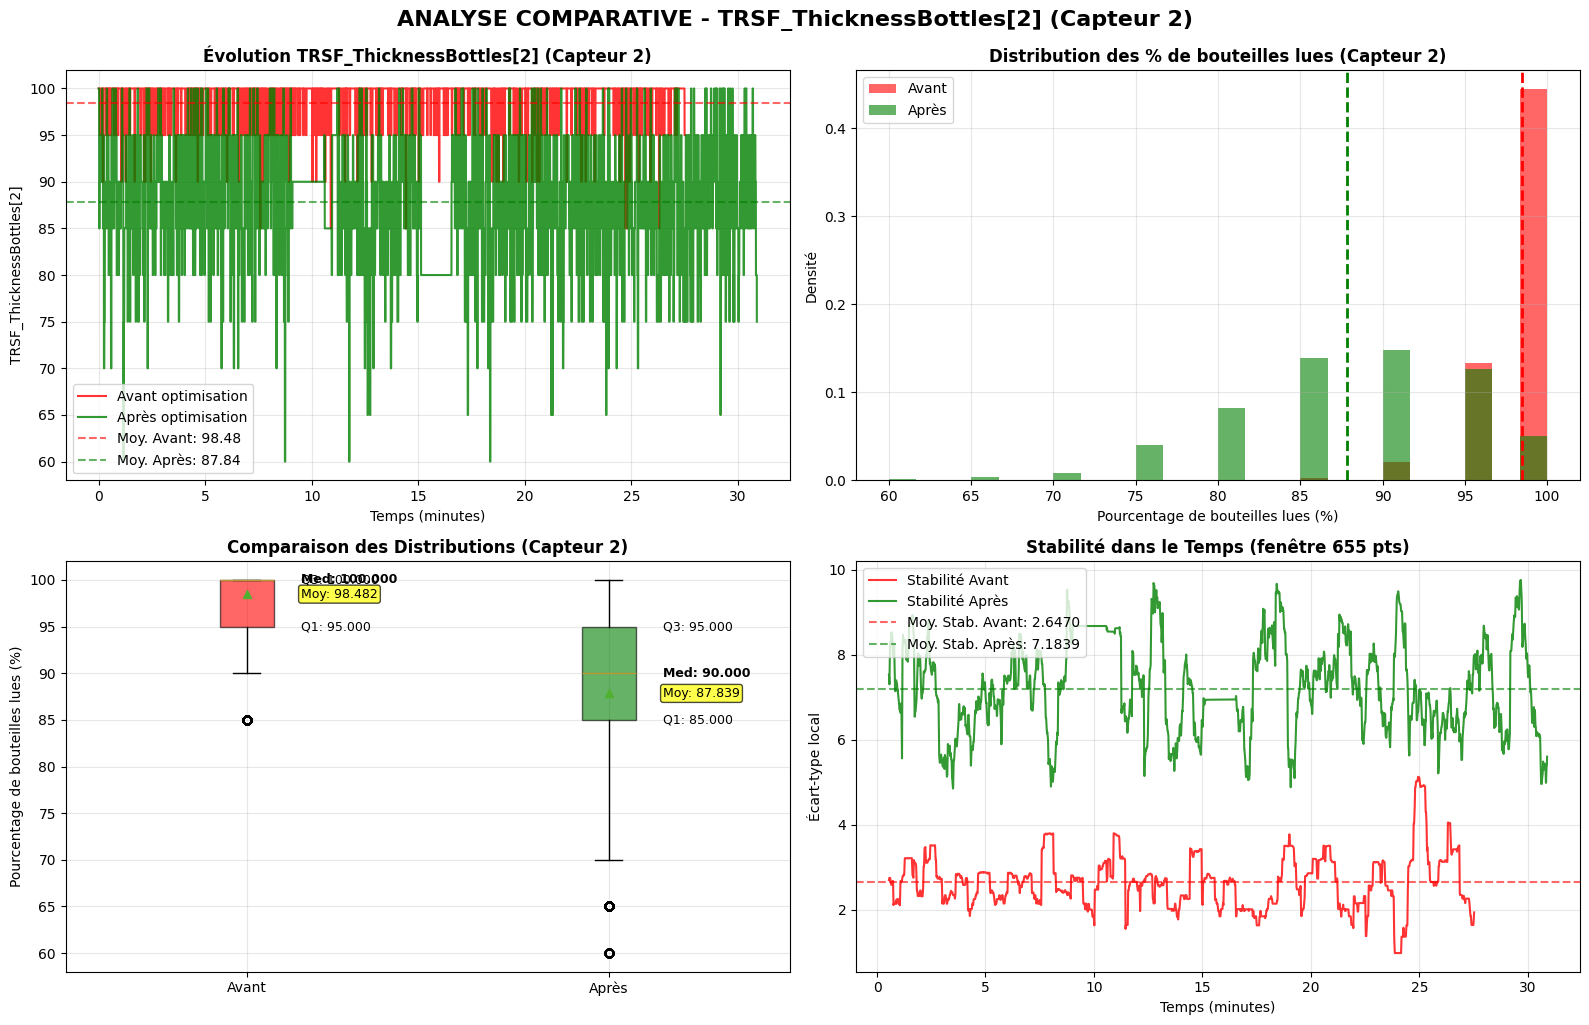


🎯 RÉSUMÉ EXÉCUTIF - CAPTEUR 2
📈 Variation moyenne: -10.6436 %
📊 Amélioration stabilité: -4.6673 unités d'écart-type
📉 Réduction variabilité: -5.66 points de CV
❌ DÉGRADATION: Diminution de l'épaisseur moyenne
❌ STABILITÉ DÉGRADÉE: Plus de variations

📋 Points clés:
   • Épaisseur moyenne: 98.4825 → 87.8388
   • Stabilité (σ): ±2.7769 → ±7.4441
   • Variabilité (CV): 2.82% → 8.47%
   • Plage: 15.0000 → 40.0000


In [7]:
# =============================================================================
# ANALYSE COMPARATIVE - TRSF_ThicknessBottles[2] (Capteur 2) - VERSION CORRIGÉE
# Utilise les chemins csv_file_1 et csv_file_2 déjà définis
# =============================================================================

# Import nécessaire
import numpy as np
import matplotlib.pyplot as plt

def extract_thickness_sensor2(file_path):
    """
    Extrait les données de temps et d'épaisseur du capteur 2
    """
    with open(file_path, 'r', encoding='utf-8') as file:
        lines = file.readlines()
    
    # Trouve le début des données (après les lignes %)
    data_start = 0
    for i, line in enumerate(lines):
        if not line.startswith('%') and line.strip():
            data_start = i
            break
    
    times = []
    thickness_values = []
    
    for line in lines[data_start:]:
        if line.strip():
            values = [x.strip() for x in line.split(',') if x.strip()]
            if len(values) >= 4:  # Au moins 4 colonnes pour avoir la colonne 4
                try:
                    time_val = float(values[0]) / 60  # Temps en minutes
                    thickness_val = float(values[3])  # 4ème colonne = TRSF_ThicknessBottles[2]
                    times.append(time_val)
                    thickness_values.append(thickness_val)
                except ValueError:
                    continue
    
    return np.array(times), np.array(thickness_values)

# Chargement des données des 2 fichiers - CORRECTION ICI
print("📂 Chargement des données TRSF_ThicknessBottles[2]...")
times_avant, thick_avant = extract_thickness_sensor2(csv_file_1)  # Utilise sensor2, pas sensor1
times_apres, thick_apres = extract_thickness_sensor2(csv_file_2)  # Utilise sensor2, pas sensor1

print(f"✅ Avant: {len(thick_avant)} points sur {times_avant.max():.1f} min")
print(f"✅ Après: {len(thick_apres)} points sur {times_apres.max():.1f} min")

# =============================================================================
# STATISTIQUES COMPARATIVES
# =============================================================================

print(f"\n📊 STATISTIQUES TRSF_ThicknessBottles[2] (Capteur 2)")
print("=" * 60)
print(f"{'Métrique':<20} {'Avant':<12} {'Après':<12} {'Différence':<12}")
print("-" * 60)

stats_avant = {
    'Moyenne': np.mean(thick_avant),
    'Médiane': np.median(thick_avant), 
    'Écart-type': np.std(thick_avant),
    'Minimum': np.min(thick_avant),
    'Maximum': np.max(thick_avant),
    'Plage': np.max(thick_avant) - np.min(thick_avant),
    'CV (%)': (np.std(thick_avant) / np.mean(thick_avant)) * 100  # Coefficient de variation
}

stats_apres = {
    'Moyenne': np.mean(thick_apres),
    'Médiane': np.median(thick_apres),
    'Écart-type': np.std(thick_apres), 
    'Minimum': np.min(thick_apres),
    'Maximum': np.max(thick_apres),
    'Plage': np.max(thick_apres) - np.min(thick_apres),
    'CV (%)': (np.std(thick_apres) / np.mean(thick_apres)) * 100
}

for metric in stats_avant.keys():
    avant = stats_avant[metric]
    apres = stats_apres[metric]
    diff = apres - avant
    if metric == 'CV (%)':
        print(f"{metric:<20} {avant:<12.2f} {apres:<12.2f} {diff:<+12.2f}")
    else:
        print(f"{metric:<20} {avant:<12.3f} {apres:<12.3f} {diff:<+12.3f}")

# =============================================================================
# GRAPHIQUES COMPARATIFS
# =============================================================================

print(f"\n📈 Création des graphiques pour le Capteur 2...")

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 10))

# 1. Évolution temporelle
ax1.plot(times_avant, thick_avant, 'r-', label='Avant optimisation', linewidth=1.5, alpha=0.8)
ax1.plot(times_apres, thick_apres, 'g-', label='Après optimisation', linewidth=1.5, alpha=0.8) 

# Lignes de référence (moyennes)
ax1.axhline(y=np.mean(thick_avant), color='red', linestyle='--', alpha=0.6, 
           label=f'Moy. Avant: {np.mean(thick_avant):.2f}')
ax1.axhline(y=np.mean(thick_apres), color='green', linestyle='--', alpha=0.6,
           label=f'Moy. Après: {np.mean(thick_apres):.2f}')

ax1.set_title('Évolution TRSF_ThicknessBottles[2] (Capteur 2)', fontweight='bold', fontsize=12)
ax1.set_xlabel('Temps (minutes)')
ax1.set_ylabel('TRSF_ThicknessBottles[2]')
ax1.legend()
ax1.grid(True, alpha=0.3)

# 2. Histogrammes comparatifs
bins = np.linspace(min(np.min(thick_avant), np.min(thick_apres)), 
                   max(np.max(thick_avant), np.max(thick_apres)), 25)
ax2.hist(thick_avant, bins=bins, alpha=0.6, color='red', label='Avant', density=True)
ax2.hist(thick_apres, bins=bins, alpha=0.6, color='green', label='Après', density=True)
ax2.axvline(np.mean(thick_avant), color='red', linestyle='--', linewidth=2)
ax2.axvline(np.mean(thick_apres), color='green', linestyle='--', linewidth=2)
ax2.set_title('Distribution des % de bouteilles lues (Capteur 2)', fontweight='bold', fontsize=12)
ax2.set_xlabel('Pourcentage de bouteilles lues (%)')
ax2.set_ylabel('Densité')
ax2.legend()
ax2.grid(True, alpha=0.3)

# 3. Box plots avec quartiles
box_data = [thick_avant, thick_apres]
bp = ax3.boxplot(box_data, labels=['Avant', 'Après'], patch_artist=True, showmeans=True)

# Couleurs des boîtes
bp['boxes'][0].set_facecolor('red')
bp['boxes'][0].set_alpha(0.6)
bp['boxes'][1].set_facecolor('green')
bp['boxes'][1].set_alpha(0.6)

# Ajout des valeurs des quartiles
for i, data in enumerate(box_data):
    q1 = np.percentile(data, 25)
    q2 = np.percentile(data, 50)  # médiane
    q3 = np.percentile(data, 75)
    mean_val = np.mean(data)
    
    x_pos = i + 1
    
    # Annotations des quartiles
    ax3.text(x_pos + 0.15, q1, f'Q1: {q1:.3f}', fontsize=9, va='center', ha='left')
    ax3.text(x_pos + 0.15, q2, f'Med: {q2:.3f}', fontsize=9, va='center', ha='left', fontweight='bold')
    ax3.text(x_pos + 0.15, q3, f'Q3: {q3:.3f}', fontsize=9, va='center', ha='left')
    ax3.text(x_pos + 0.15, mean_val, f'Moy: {mean_val:.3f}', fontsize=9, va='center', ha='left', 
             bbox=dict(boxstyle="round,pad=0.2", facecolor="yellow", alpha=0.7))

ax3.set_title('Comparaison des Distributions (Capteur 2)', fontweight='bold', fontsize=12)
ax3.set_ylabel('Pourcentage de bouteilles lues (%)')
ax3.grid(True, alpha=0.3)

# 4. Analyse de la variabilité dans le temps (fenêtres glissantes)
window_size = max(10, len(thick_avant) // 50)  # Fenêtre adaptative

def rolling_std(data, window):
    """Calcule l'écart-type sur fenêtre glissante"""
    rolling_stds = []
    for i in range(len(data) - window + 1):
        rolling_stds.append(np.std(data[i:i+window]))
    return np.array(rolling_stds)

if len(thick_avant) > window_size and len(thick_apres) > window_size:
    std_avant = rolling_std(thick_avant, window_size)
    std_apres = rolling_std(thick_apres, window_size)
    
    time_window_avant = times_avant[window_size-1:]
    time_window_apres = times_apres[window_size-1:]
    
    ax4.plot(time_window_avant, std_avant, 'r-', label='Stabilité Avant', linewidth=1.5, alpha=0.8)
    ax4.plot(time_window_apres, std_apres, 'g-', label='Stabilité Après', linewidth=1.5, alpha=0.8)
    
    ax4.axhline(y=np.mean(std_avant), color='red', linestyle='--', alpha=0.6,
               label=f'Moy. Stab. Avant: {np.mean(std_avant):.4f}')
    ax4.axhline(y=np.mean(std_apres), color='green', linestyle='--', alpha=0.6,
               label=f'Moy. Stab. Après: {np.mean(std_apres):.4f}')
    
    ax4.set_title(f'Stabilité dans le Temps (fenêtre {window_size} pts)', fontweight='bold', fontsize=12)
    ax4.set_xlabel('Temps (minutes)')
    ax4.set_ylabel('Écart-type local')
    ax4.legend()
else:
    ax4.text(0.5, 0.5, 'Pas assez de données\npour l\'analyse de stabilité', 
            transform=ax4.transAxes, ha='center', va='center', fontsize=12)
    ax4.set_title('Analyse de Stabilité')

ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.suptitle('ANALYSE COMPARATIVE - TRSF_ThicknessBottles[2] (Capteur 2)', 
             fontsize=16, fontweight='bold', y=1.02)
plt.show()

# =============================================================================
# RÉSUMÉ EXÉCUTIF
# =============================================================================

amelioration_moyenne = np.mean(thick_apres) - np.mean(thick_avant)
amelioration_stabilite = np.std(thick_avant) - np.std(thick_apres)  # Réduction = amélioration
amelioration_cv = stats_avant['CV (%)'] - stats_apres['CV (%)']  # Réduction = amélioration

print(f"\n🎯 RÉSUMÉ EXÉCUTIF - CAPTEUR 2")
print("=" * 50)
print(f"📈 Variation moyenne: {amelioration_moyenne:+.4f} %")
print(f"📊 Amélioration stabilité: {amelioration_stabilite:+.4f} unités d'écart-type")
print(f"📉 Réduction variabilité: {amelioration_cv:+.2f} points de CV")

if abs(amelioration_moyenne) < 0.5:  # Seuil de significativité
    print(f"➡️ STABILITÉ: Pas de changement significatif de la moyenne")
else:
    if amelioration_moyenne > 0:
        print(f"✅ AMÉLIORATION: Augmentation de l'épaisseur moyenne")
    else:
        print(f"❌ DÉGRADATION: Diminution de l'épaisseur moyenne")

if amelioration_stabilite > 0:
    print(f"✅ STABILITÉ AMÉLIORÉE: Moins de variations")
else:
    print(f"❌ STABILITÉ DÉGRADÉE: Plus de variations")

print(f"\n📋 Points clés:")
print(f"   • Épaisseur moyenne: {np.mean(thick_avant):.4f} → {np.mean(thick_apres):.4f}")
print(f"   • Stabilité (σ): ±{np.std(thick_avant):.4f} → ±{np.std(thick_apres):.4f}")
print(f"   • Variabilité (CV): {stats_avant['CV (%)']:.2f}% → {stats_apres['CV (%)']:.2f}%")
print(f"   • Plage: {stats_avant['Plage']:.4f} → {stats_apres['Plage']:.4f}")

📂 Chargement des données TRSF_ThicknessBottles[3]...
✅ Avant: 32767 points sur 27.5 min
✅ Après: 32767 points sur 30.9 min

📊 STATISTIQUES TRSF_ThicknessBottles[3] (Capteur 3)
Métrique             Avant        Après        Différence  
------------------------------------------------------------
Moyenne              95.624       93.912       -1.712      
Médiane              95.000       95.000       +0.000      
Écart-type           4.230        4.950        +0.720      
Minimum              75.000       75.000       +0.000      
Maximum              100.000      100.000      +0.000      
Plage                25.000       25.000       +0.000      
CV (%)               4.42         5.27         +0.85       

📈 Création des graphiques pour le Capteur 3...


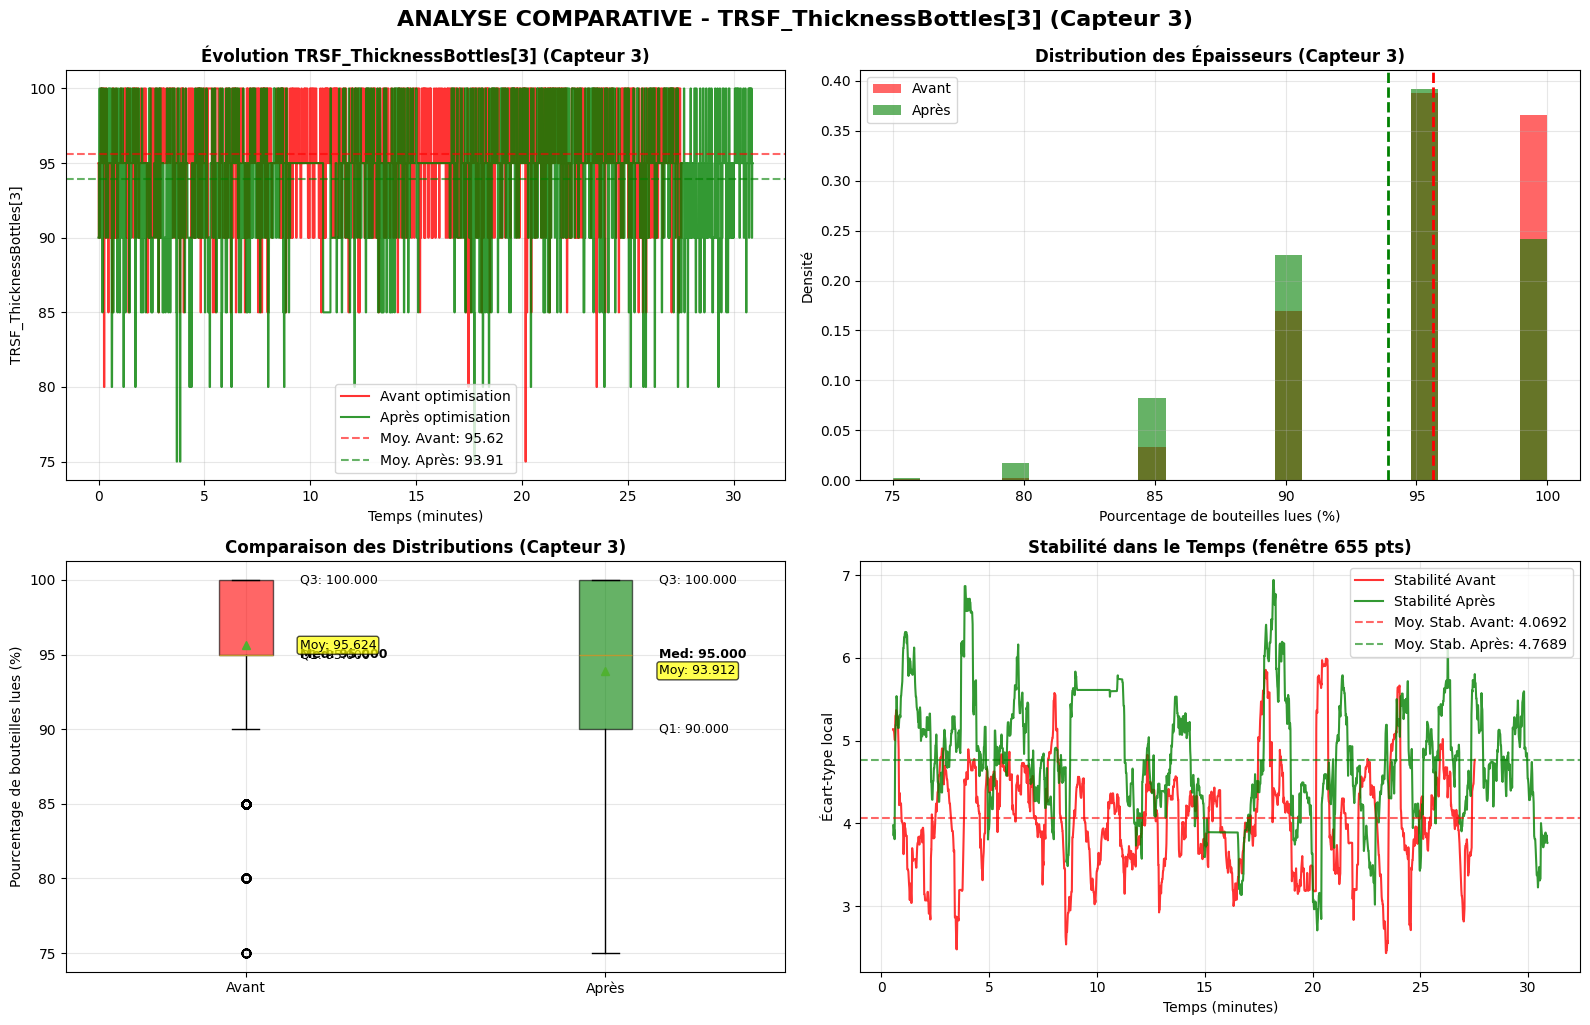


🎯 RÉSUMÉ EXÉCUTIF - CAPTEUR 3
📈 Variation moyenne: -1.7122 %
📊 Amélioration stabilité: -0.7203 unités d'écart-type
📉 Réduction variabilité: -0.85 points de CV
❌ DÉGRADATION: Diminution du pourcentage bouteilles mesurées moyen
❌ STABILITÉ DÉGRADÉE: Plus de variations

📋 Points clés:
   • Pourcentage bouteilles mesurées moyen: 95.6243 → 93.9120
   • Stabilité (σ): ±4.2299 → ±4.9501
   • Variabilité (CV): 4.42% → 5.27%
   • Plage: 25.0000 → 25.0000


In [8]:
# =============================================================================
# ANALYSE COMPARATIVE - TRSF_ThicknessBottles[3] (Capteur 3)
# Utilise les chemins csv_file_1 et csv_file_2 déjà définis
# =============================================================================

# Import nécessaire
import numpy as np
import matplotlib.pyplot as plt

def extract_thickness_sensor3(file_path):
    """
    Extrait les données de temps et d'épaisseur du capteur 3
    """
    with open(file_path, 'r', encoding='utf-8') as file:
        lines = file.readlines()
    
    # Trouve le début des données (après les lignes %)
    data_start = 0
    for i, line in enumerate(lines):
        if not line.startswith('%') and line.strip():
            data_start = i
            break
    
    times = []
    thickness_values = []
    
    for line in lines[data_start:]:
        if line.strip():
            values = [x.strip() for x in line.split(',') if x.strip()]
            if len(values) >= 6:  # Au moins 6 colonnes pour avoir la colonne 6
                try:
                    time_val = float(values[0]) / 60  # Temps en minutes
                    thickness_val = float(values[5])  # 6ème colonne = TRSF_ThicknessBottles[3]
                    times.append(time_val)
                    thickness_values.append(thickness_val)
                except ValueError:
                    continue
    
    return np.array(times), np.array(thickness_values)

# Chargement des données des 2 fichiers
print("📂 Chargement des données TRSF_ThicknessBottles[3]...")
times_avant, thick_avant = extract_thickness_sensor3(csv_file_1)
times_apres, thick_apres = extract_thickness_sensor3(csv_file_2)

print(f"✅ Avant: {len(thick_avant)} points sur {times_avant.max():.1f} min")
print(f"✅ Après: {len(thick_apres)} points sur {times_apres.max():.1f} min")

# =============================================================================
# STATISTIQUES COMPARATIVES
# =============================================================================

print(f"\n📊 STATISTIQUES TRSF_ThicknessBottles[3] (Capteur 3)")
print("=" * 60)
print(f"{'Métrique':<20} {'Avant':<12} {'Après':<12} {'Différence':<12}")
print("-" * 60)

stats_avant = {
    'Moyenne': np.mean(thick_avant),
    'Médiane': np.median(thick_avant), 
    'Écart-type': np.std(thick_avant),
    'Minimum': np.min(thick_avant),
    'Maximum': np.max(thick_avant),
    'Plage': np.max(thick_avant) - np.min(thick_avant),
    'CV (%)': (np.std(thick_avant) / np.mean(thick_avant)) * 100  # Coefficient de variation
}

stats_apres = {
    'Moyenne': np.mean(thick_apres),
    'Médiane': np.median(thick_apres),
    'Écart-type': np.std(thick_apres), 
    'Minimum': np.min(thick_apres),
    'Maximum': np.max(thick_apres),
    'Plage': np.max(thick_apres) - np.min(thick_apres),
    'CV (%)': (np.std(thick_apres) / np.mean(thick_apres)) * 100
}

for metric in stats_avant.keys():
    avant = stats_avant[metric]
    apres = stats_apres[metric]
    diff = apres - avant
    if metric == 'CV (%)':
        print(f"{metric:<20} {avant:<12.2f} {apres:<12.2f} {diff:<+12.2f}")
    else:
        print(f"{metric:<20} {avant:<12.3f} {apres:<12.3f} {diff:<+12.3f}")

# =============================================================================
# GRAPHIQUES COMPARATIFS
# =============================================================================

print(f"\n📈 Création des graphiques pour le Capteur 3...")

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 10))

# 1. Évolution temporelle
ax1.plot(times_avant, thick_avant, 'r-', label='Avant optimisation', linewidth=1.5, alpha=0.8)
ax1.plot(times_apres, thick_apres, 'g-', label='Après optimisation', linewidth=1.5, alpha=0.8) 

# Lignes de référence (moyennes)
ax1.axhline(y=np.mean(thick_avant), color='red', linestyle='--', alpha=0.6, 
           label=f'Moy. Avant: {np.mean(thick_avant):.2f}')
ax1.axhline(y=np.mean(thick_apres), color='green', linestyle='--', alpha=0.6,
           label=f'Moy. Après: {np.mean(thick_apres):.2f}')

ax1.set_title('Évolution TRSF_ThicknessBottles[3] (Capteur 3)', fontweight='bold', fontsize=12)
ax1.set_xlabel('Temps (minutes)')
ax1.set_ylabel('TRSF_ThicknessBottles[3]')
ax1.legend()
ax1.grid(True, alpha=0.3)

# 2. Histogrammes comparatifs
bins = np.linspace(min(np.min(thick_avant), np.min(thick_apres)), 
                   max(np.max(thick_avant), np.max(thick_apres)), 25)
ax2.hist(thick_avant, bins=bins, alpha=0.6, color='red', label='Avant', density=True)
ax2.hist(thick_apres, bins=bins, alpha=0.6, color='green', label='Après', density=True)
ax2.axvline(np.mean(thick_avant), color='red', linestyle='--', linewidth=2)
ax2.axvline(np.mean(thick_apres), color='green', linestyle='--', linewidth=2)
ax2.set_title('Distribution des Épaisseurs (Capteur 3)', fontweight='bold', fontsize=12)
ax2.set_xlabel('Pourcentage de bouteilles lues (%)')
ax2.set_ylabel('Densité')
ax2.legend()
ax2.grid(True, alpha=0.3)

# 3. Box plots avec quartiles
box_data = [thick_avant, thick_apres]
bp = ax3.boxplot(box_data, labels=['Avant', 'Après'], patch_artist=True, showmeans=True)

# Couleurs des boîtes
bp['boxes'][0].set_facecolor('red')
bp['boxes'][0].set_alpha(0.6)
bp['boxes'][1].set_facecolor('green')
bp['boxes'][1].set_alpha(0.6)

# Ajout des valeurs des quartiles
for i, data in enumerate(box_data):
    q1 = np.percentile(data, 25)
    q2 = np.percentile(data, 50)  # médiane
    q3 = np.percentile(data, 75)
    mean_val = np.mean(data)
    
    x_pos = i + 1
    
    # Annotations des quartiles
    ax3.text(x_pos + 0.15, q1, f'Q1: {q1:.3f}', fontsize=9, va='center', ha='left')
    ax3.text(x_pos + 0.15, q2, f'Med: {q2:.3f}', fontsize=9, va='center', ha='left', fontweight='bold')
    ax3.text(x_pos + 0.15, q3, f'Q3: {q3:.3f}', fontsize=9, va='center', ha='left')
    ax3.text(x_pos + 0.15, mean_val, f'Moy: {mean_val:.3f}', fontsize=9, va='center', ha='left', 
             bbox=dict(boxstyle="round,pad=0.2", facecolor="yellow", alpha=0.7))

ax3.set_title('Comparaison des Distributions (Capteur 3)', fontweight='bold', fontsize=12)
ax3.set_ylabel('Pourcentage de bouteilles lues (%)')
ax3.grid(True, alpha=0.3)

# 4. Analyse de la variabilité dans le temps (fenêtres glissantes)
window_size = max(10, len(thick_avant) // 50)  # Fenêtre adaptative

def rolling_std(data, window):
    """Calcule l'écart-type sur fenêtre glissante"""
    rolling_stds = []
    for i in range(len(data) - window + 1):
        rolling_stds.append(np.std(data[i:i+window]))
    return np.array(rolling_stds)

if len(thick_avant) > window_size and len(thick_apres) > window_size:
    std_avant = rolling_std(thick_avant, window_size)
    std_apres = rolling_std(thick_apres, window_size)
    
    time_window_avant = times_avant[window_size-1:]
    time_window_apres = times_apres[window_size-1:]
    
    ax4.plot(time_window_avant, std_avant, 'r-', label='Stabilité Avant', linewidth=1.5, alpha=0.8)
    ax4.plot(time_window_apres, std_apres, 'g-', label='Stabilité Après', linewidth=1.5, alpha=0.8)
    
    ax4.axhline(y=np.mean(std_avant), color='red', linestyle='--', alpha=0.6,
               label=f'Moy. Stab. Avant: {np.mean(std_avant):.4f}')
    ax4.axhline(y=np.mean(std_apres), color='green', linestyle='--', alpha=0.6,
               label=f'Moy. Stab. Après: {np.mean(std_apres):.4f}')
    
    ax4.set_title(f'Stabilité dans le Temps (fenêtre {window_size} pts)', fontweight='bold', fontsize=12)
    ax4.set_xlabel('Temps (minutes)')
    ax4.set_ylabel('Écart-type local')
    ax4.legend()
else:
    ax4.text(0.5, 0.5, 'Pas assez de données\npour l\'analyse de stabilité', 
            transform=ax4.transAxes, ha='center', va='center', fontsize=12)
    ax4.set_title('Analyse de Stabilité')

ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.suptitle('ANALYSE COMPARATIVE - TRSF_ThicknessBottles[3] (Capteur 3)', 
             fontsize=16, fontweight='bold', y=1.02)
plt.show()

# =============================================================================
# RÉSUMÉ EXÉCUTIF
# =============================================================================

amelioration_moyenne = np.mean(thick_apres) - np.mean(thick_avant)
amelioration_stabilite = np.std(thick_avant) - np.std(thick_apres)  # Réduction = amélioration
amelioration_cv = stats_avant['CV (%)'] - stats_apres['CV (%)']  # Réduction = amélioration

print(f"\n🎯 RÉSUMÉ EXÉCUTIF - CAPTEUR 3")
print("=" * 50)
print(f"📈 Variation moyenne: {amelioration_moyenne:+.4f} %")
print(f"📊 Amélioration stabilité: {amelioration_stabilite:+.4f} unités d'écart-type")
print(f"📉 Réduction variabilité: {amelioration_cv:+.2f} points de CV")

if abs(amelioration_moyenne) < 0.5:  # Seuil de significativité
    print(f"➡️ STABILITÉ: Pas de changement significatif de la moyenne")
else:
    if amelioration_moyenne > 0:
        print(f"✅ AMÉLIORATION: Augmentation du pourcentage bouteilles mesurées moyen")
    else:
        print(f"❌ DÉGRADATION: Diminution du pourcentage bouteilles mesurées moyen")

if amelioration_stabilite > 0:
    print(f"✅ STABILITÉ AMÉLIORÉE: Moins de variations")
else:
    print(f"❌ STABILITÉ DÉGRADÉE: Plus de variations")

print(f"\n📋 Points clés:")
print(f"   • Pourcentage bouteilles mesurées moyen: {np.mean(thick_avant):.4f} → {np.mean(thick_apres):.4f}")
print(f"   • Stabilité (σ): ±{np.std(thick_avant):.4f} → ±{np.std(thick_apres):.4f}")
print(f"   • Variabilité (CV): {stats_avant['CV (%)']:.2f}% → {stats_apres['CV (%)']:.2f}%")
print(f"   • Plage: {stats_avant['Plage']:.4f} → {stats_apres['Plage']:.4f}")

📂 Chargement des données TRSF_ThicknessBottles[4]...
✅ Avant: 32767 points sur 27.5 min
✅ Après: 32767 points sur 30.9 min

📊 STATISTIQUES TRSF_ThicknessBottles[4] (Capteur 4)
Métrique             Avant        Après        Différence  
------------------------------------------------------------
Moyenne              98.509       87.621       -10.888     
Médiane              100.000      90.000       -10.000     
Écart-type           2.708        10.000       +7.293      
Minimum              85.000       55.000       -30.000     
Maximum              100.000      100.000      +0.000      
Plage                15.000       45.000       +30.000     
CV (%)               2.75         11.41        +8.66       

📈 Création des graphiques pour le Capteur 4...


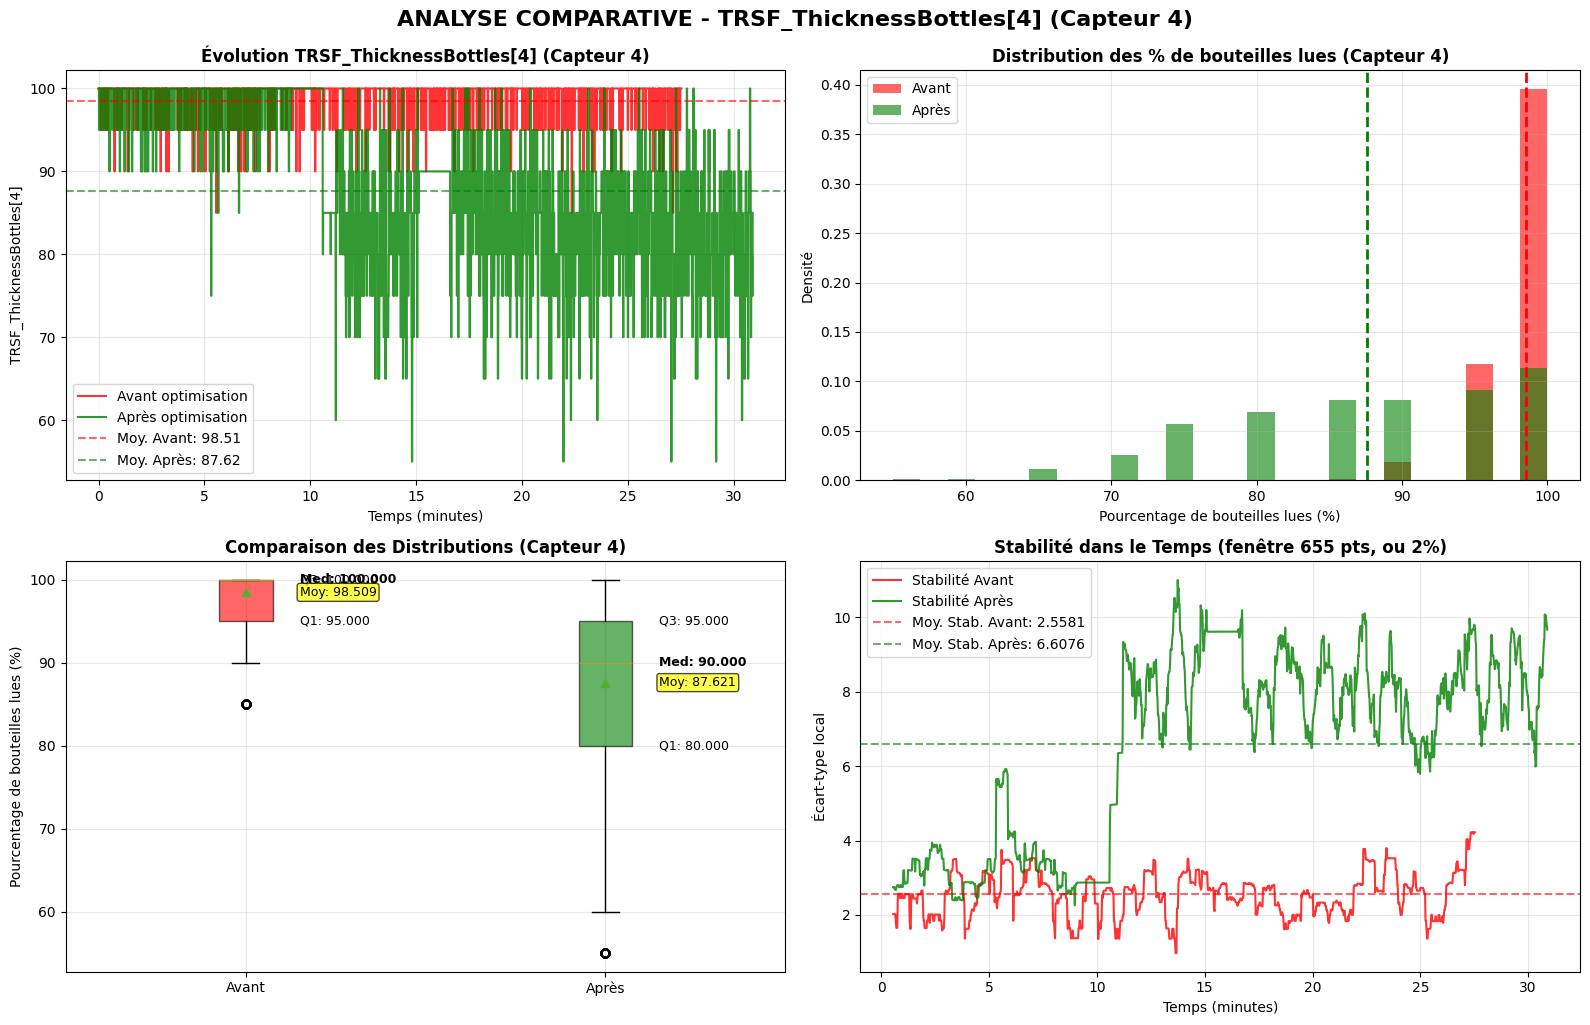


🎯 RÉSUMÉ EXÉCUTIF - CAPTEUR 4
📈 Variation moyenne: -10.8879 %
📊 Amélioration stabilité: -7.2929 unités d'écart-type
📉 Réduction variabilité: -8.66 points de CV
❌ DÉGRADATION: Diminution du pourcentage bouteilles mesurées moyen
❌ STABILITÉ DÉGRADÉE: Plus de variations

📋 Points clés:
   • Pourcentage bouteilles mesurées moyen: 98.5093 → 87.6214
   • Stabilité (σ): ±2.7076 → ±10.0005
   • Variabilité (CV): 2.75% → 11.41%
   • Plage: 15.0000 → 45.0000


In [9]:
# =============================================================================
# ANALYSE COMPARATIVE - TRSF_ThicknessBottles[4] (Capteur 4)
# Utilise les chemins csv_file_1 et csv_file_2 déjà définis
# =============================================================================

# Import nécessaire
import numpy as np
import matplotlib.pyplot as plt

def extract_thickness_sensor4(file_path):
    """
    Extrait les données de temps et d'épaisseur du capteur 4
    """
    with open(file_path, 'r', encoding='utf-8') as file:
        lines = file.readlines()
    
    # Trouve le début des données (après les lignes %)
    data_start = 0
    for i, line in enumerate(lines):
        if not line.startswith('%') and line.strip():
            data_start = i
            break
    
    times = []
    thickness_values = []
    
    for line in lines[data_start:]:
        if line.strip():
            values = [x.strip() for x in line.split(',') if x.strip()]
            if len(values) >= 8:  # Au moins 8 colonnes pour avoir la colonne 8
                try:
                    time_val = float(values[0]) / 60  # Temps en minutes
                    thickness_val = float(values[7])  # 8ème colonne = TRSF_ThicknessBottles[4]
                    times.append(time_val)
                    thickness_values.append(thickness_val)
                except ValueError:
                    continue
    
    return np.array(times), np.array(thickness_values)

# Chargement des données des 2 fichiers
print("📂 Chargement des données TRSF_ThicknessBottles[4]...")
times_avant, thick_avant = extract_thickness_sensor4(csv_file_1)
times_apres, thick_apres = extract_thickness_sensor4(csv_file_2)

print(f"✅ Avant: {len(thick_avant)} points sur {times_avant.max():.1f} min")
print(f"✅ Après: {len(thick_apres)} points sur {times_apres.max():.1f} min")

# =============================================================================
# STATISTIQUES COMPARATIVES
# =============================================================================

print(f"\n📊 STATISTIQUES TRSF_ThicknessBottles[4] (Capteur 4)")
print("=" * 60)
print(f"{'Métrique':<20} {'Avant':<12} {'Après':<12} {'Différence':<12}")
print("-" * 60)

stats_avant = {
    'Moyenne': np.mean(thick_avant),
    'Médiane': np.median(thick_avant), 
    'Écart-type': np.std(thick_avant),
    'Minimum': np.min(thick_avant),
    'Maximum': np.max(thick_avant),
    'Plage': np.max(thick_avant) - np.min(thick_avant),
    'CV (%)': (np.std(thick_avant) / np.mean(thick_avant)) * 100  # Coefficient de variation
}

stats_apres = {
    'Moyenne': np.mean(thick_apres),
    'Médiane': np.median(thick_apres),
    'Écart-type': np.std(thick_apres), 
    'Minimum': np.min(thick_apres),
    'Maximum': np.max(thick_apres),
    'Plage': np.max(thick_apres) - np.min(thick_apres),
    'CV (%)': (np.std(thick_apres) / np.mean(thick_apres)) * 100
}

for metric in stats_avant.keys():
    avant = stats_avant[metric]
    apres = stats_apres[metric]
    diff = apres - avant
    if metric == 'CV (%)':
        print(f"{metric:<20} {avant:<12.2f} {apres:<12.2f} {diff:<+12.2f}")
    else:
        print(f"{metric:<20} {avant:<12.3f} {apres:<12.3f} {diff:<+12.3f}")

# =============================================================================
# GRAPHIQUES COMPARATIFS
# =============================================================================

print(f"\n📈 Création des graphiques pour le Capteur 4...")

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 10))

# 1. Évolution temporelle
ax1.plot(times_avant, thick_avant, 'r-', label='Avant optimisation', linewidth=1.5, alpha=0.8)
ax1.plot(times_apres, thick_apres, 'g-', label='Après optimisation', linewidth=1.5, alpha=0.8) 

# Lignes de référence (moyennes)
ax1.axhline(y=np.mean(thick_avant), color='red', linestyle='--', alpha=0.6, 
           label=f'Moy. Avant: {np.mean(thick_avant):.2f}')
ax1.axhline(y=np.mean(thick_apres), color='green', linestyle='--', alpha=0.6,
           label=f'Moy. Après: {np.mean(thick_apres):.2f}')

ax1.set_title('Évolution TRSF_ThicknessBottles[4] (Capteur 4)', fontweight='bold', fontsize=12)
ax1.set_xlabel('Temps (minutes)')
ax1.set_ylabel('TRSF_ThicknessBottles[4]')
ax1.legend()
ax1.grid(True, alpha=0.3)

# 2. Histogrammes comparatifs
bins = np.linspace(min(np.min(thick_avant), np.min(thick_apres)), 
                   max(np.max(thick_avant), np.max(thick_apres)), 25)
ax2.hist(thick_avant, bins=bins, alpha=0.6, color='red', label='Avant', density=True)
ax2.hist(thick_apres, bins=bins, alpha=0.6, color='green', label='Après', density=True)
ax2.axvline(np.mean(thick_avant), color='red', linestyle='--', linewidth=2)
ax2.axvline(np.mean(thick_apres), color='green', linestyle='--', linewidth=2)
ax2.set_title('Distribution des % de bouteilles lues (Capteur 4)', fontweight='bold', fontsize=12)
ax2.set_xlabel('Pourcentage de bouteilles lues (%)')
ax2.set_ylabel('Densité')
ax2.legend()
ax2.grid(True, alpha=0.3)

# 3. Box plots avec quartiles
box_data = [thick_avant, thick_apres]
bp = ax3.boxplot(box_data, labels=['Avant', 'Après'], patch_artist=True, showmeans=True)

# Couleurs des boîtes
bp['boxes'][0].set_facecolor('red')
bp['boxes'][0].set_alpha(0.6)
bp['boxes'][1].set_facecolor('green')
bp['boxes'][1].set_alpha(0.6)

# Ajout des valeurs des quartiles
for i, data in enumerate(box_data):
    q1 = np.percentile(data, 25)
    q2 = np.percentile(data, 50)  # médiane
    q3 = np.percentile(data, 75)
    mean_val = np.mean(data)
    
    x_pos = i + 1
    
    # Annotations des quartiles
    ax3.text(x_pos + 0.15, q1, f'Q1: {q1:.3f}', fontsize=9, va='center', ha='left')
    ax3.text(x_pos + 0.15, q2, f'Med: {q2:.3f}', fontsize=9, va='center', ha='left', fontweight='bold')
    ax3.text(x_pos + 0.15, q3, f'Q3: {q3:.3f}', fontsize=9, va='center', ha='left')
    ax3.text(x_pos + 0.15, mean_val, f'Moy: {mean_val:.3f}', fontsize=9, va='center', ha='left', 
             bbox=dict(boxstyle="round,pad=0.2", facecolor="yellow", alpha=0.7))

ax3.set_title('Comparaison des Distributions (Capteur 4)', fontweight='bold', fontsize=12)
ax3.set_ylabel('Pourcentage de bouteilles lues (%)')
ax3.grid(True, alpha=0.3)

# 4. Analyse de la variabilité dans le temps (fenêtres glissantes)
window_size = max(10, len(thick_avant) // 50)  # Fenêtre adaptative

def rolling_std(data, window):
    """Calcule l'écart-type sur fenêtre glissante"""
    rolling_stds = []
    for i in range(len(data) - window + 1):
        rolling_stds.append(np.std(data[i:i+window]))
    return np.array(rolling_stds)

if len(thick_avant) > window_size and len(thick_apres) > window_size:
    std_avant = rolling_std(thick_avant, window_size)
    std_apres = rolling_std(thick_apres, window_size)
    
    time_window_avant = times_avant[window_size-1:]
    time_window_apres = times_apres[window_size-1:]
    
    ax4.plot(time_window_avant, std_avant, 'r-', label='Stabilité Avant', linewidth=1.5, alpha=0.8)
    ax4.plot(time_window_apres, std_apres, 'g-', label='Stabilité Après', linewidth=1.5, alpha=0.8)
    
    ax4.axhline(y=np.mean(std_avant), color='red', linestyle='--', alpha=0.6,
               label=f'Moy. Stab. Avant: {np.mean(std_avant):.4f}')
    ax4.axhline(y=np.mean(std_apres), color='green', linestyle='--', alpha=0.6,
               label=f'Moy. Stab. Après: {np.mean(std_apres):.4f}')
    
    ax4.set_title(f'Stabilité dans le Temps (fenêtre {window_size} pts, ou 2%)', fontweight='bold', fontsize=12)
    ax4.set_xlabel('Temps (minutes)')
    ax4.set_ylabel('Écart-type local')
    ax4.legend()
else:
    ax4.text(0.5, 0.5, 'Pas assez de données\npour l\'analyse de stabilité', 
            transform=ax4.transAxes, ha='center', va='center', fontsize=12)
    ax4.set_title('Analyse de Stabilité')

ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.suptitle('ANALYSE COMPARATIVE - TRSF_ThicknessBottles[4] (Capteur 4)', 
             fontsize=16, fontweight='bold', y=1.02)
plt.show()

# =============================================================================
# RÉSUMÉ EXÉCUTIF
# =============================================================================

amelioration_moyenne = np.mean(thick_apres) - np.mean(thick_avant)
amelioration_stabilite = np.std(thick_avant) - np.std(thick_apres)  # Réduction = amélioration
amelioration_cv = stats_avant['CV (%)'] - stats_apres['CV (%)']  # Réduction = amélioration

print(f"\n🎯 RÉSUMÉ EXÉCUTIF - CAPTEUR 4")
print("=" * 50)
print(f"📈 Variation moyenne: {amelioration_moyenne:+.4f} %")
print(f"📊 Amélioration stabilité: {amelioration_stabilite:+.4f} unités d'écart-type")
print(f"📉 Réduction variabilité: {amelioration_cv:+.2f} points de CV")

if abs(amelioration_moyenne) < 0.5:  # Seuil de significativité
    print(f"➡️ STABILITÉ: Pas de changement significatif de la moyenne")
else:
    if amelioration_moyenne > 0:
        print(f"✅ AMÉLIORATION: Augmentation du pourcentage bouteilles mesurées moyen")
    else:
        print(f"❌ DÉGRADATION: Diminution du pourcentage bouteilles mesurées moyen")

if amelioration_stabilite > 0:
    print(f"✅ STABILITÉ AMÉLIORÉE: Moins de variations")
else:
    print(f"❌ STABILITÉ DÉGRADÉE: Plus de variations")

print(f"\n📋 Points clés:")
print(f"   • Pourcentage bouteilles mesurées moyen: {np.mean(thick_avant):.4f} → {np.mean(thick_apres):.4f}")
print(f"   • Stabilité (σ): ±{np.std(thick_avant):.4f} → ±{np.std(thick_apres):.4f}")
print(f"   • Variabilité (CV): {stats_avant['CV (%)']:.2f}% → {stats_apres['CV (%)']:.2f}%")
print(f"   • Plage: {stats_avant['Plage']:.4f} → {stats_apres['Plage']:.4f}")

📂 Chargement des 4 capteurs (fichier après optimisation)...
✅ 32767 points de données chargés sur 30.9 minutes

📊 STATISTIQUES COMPARATIVES DES 4 CAPTEURS
Métrique        Capteur 1    Capteur 2    Capteur 3    Capteur 4   
--------------------------------------------------------------------------------
Moyenne         100.0000     87.8388      93.9120      87.6214     
Médiane         100.0000     90.0000      95.0000      90.0000     
Écart-type      0.0000       7.4441       4.9501       10.0005     
Minimum         100.0000     60.0000      75.0000      55.0000     
Maximum         100.0000     100.0000     100.0000     100.0000    
Plage           0.0000       40.0000      25.0000      45.0000     
CV (%)          0.00         8.47         5.27         11.41       

📈 Création des graphiques comparatifs simplifiés...


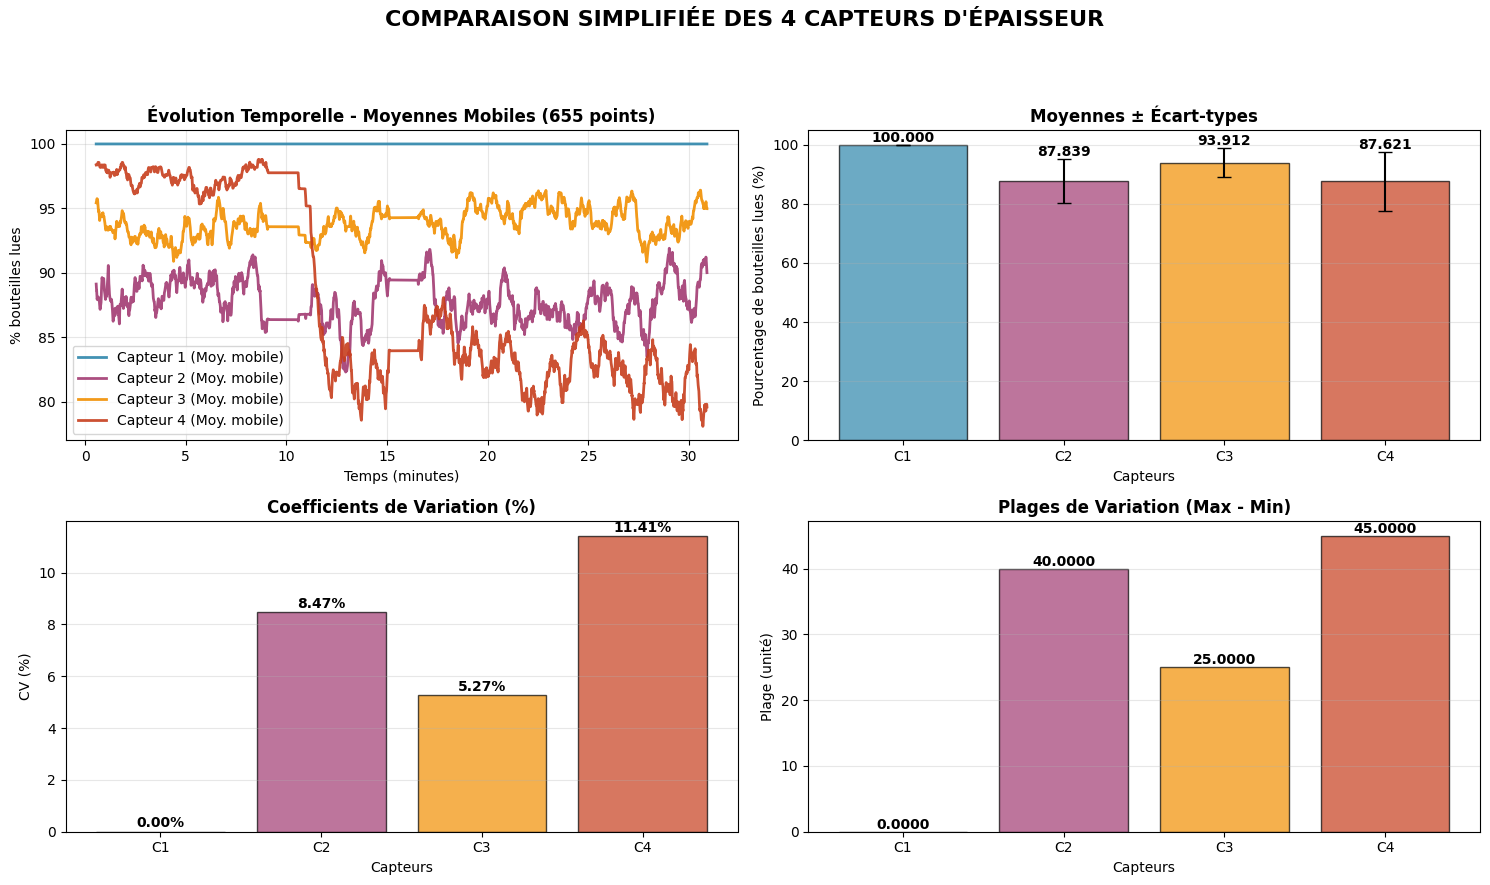


🎯 RÉSUMÉ EXÉCUTIF - COMPARAISON DES 4 CAPTEURS
🥇 Capteur le plus STABLE: Capteur 1 (CV: 0.00%)
🥉 Capteur le moins stable: Capteur 4 (CV: 11.41%)
📈 Pourcentage de bouteilles lues le plus ÉLEVÉ: Capteur 1 (100.0000)
📉 Pourcentage de bouteilles lues le plus BAS: Capteur 4 (87.6214)
📏 Plus grande PLAGE: Capteur 4 (45.0000)
📐 Plus petite plage: Capteur 1 (0.0000)

📋 Recommandations:
   • Surveiller particulièrement: Capteur 4
   • Capteur de référence recommandé: Capteur 1


In [10]:
# =============================================================================
# COMPARAISON DES 4 CAPTEURS D'ÉPAISSEUR
# Analyse du fichier après optimisation (csv_file_2)
# =============================================================================

# Import nécessaire
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def extract_all_sensors(file_path):
    """
    Extrait les données de temps et des 4 capteurs d'épaisseur
    """
    with open(file_path, 'r', encoding='utf-8') as file:
        lines = file.readlines()
    
    # Trouve le début des données (après les lignes %)
    data_start = 0
    for i, line in enumerate(lines):
        if not line.startswith('%') and line.strip():
            data_start = i
            break
    
    times = []
    sensor1_values = []
    sensor2_values = []
    sensor3_values = []
    sensor4_values = []
    
    for line in lines[data_start:]:
        if line.strip():
            values = [x.strip() for x in line.split(',') if x.strip()]
            if len(values) >= 8:  # Au moins 8 colonnes pour les 4 capteurs
                try:
                    time_val = float(values[0]) / 60  # Temps en minutes
                    sensor1_val = float(values[1])   # TRSF_ThicknessBottles[1]
                    sensor2_val = float(values[3])   # TRSF_ThicknessBottles[2]
                    sensor3_val = float(values[5])   # TRSF_ThicknessBottles[3]
                    sensor4_val = float(values[7])   # TRSF_ThicknessBottles[4]
                    
                    times.append(time_val)
                    sensor1_values.append(sensor1_val)
                    sensor2_values.append(sensor2_val)
                    sensor3_values.append(sensor3_val)
                    sensor4_values.append(sensor4_val)
                except ValueError:
                    continue
    
    return (np.array(times), 
            np.array(sensor1_values), 
            np.array(sensor2_values), 
            np.array(sensor3_values), 
            np.array(sensor4_values))

# Chargement des données du fichier après optimisation
print("📂 Chargement des 4 capteurs (fichier après optimisation)...")
times, sensor1, sensor2, sensor3, sensor4 = extract_all_sensors(csv_file_2)

print(f"✅ {len(times)} points de données chargés sur {times.max():.1f} minutes")

# =============================================================================
# STATISTIQUES COMPARATIVES DES 4 CAPTEURS
# =============================================================================

sensors_data = {
    'Capteur 1': sensor1,
    'Capteur 2': sensor2,
    'Capteur 3': sensor3,
    'Capteur 4': sensor4
}

print(f"\n📊 STATISTIQUES COMPARATIVES DES 4 CAPTEURS")
print("=" * 80)
print(f"{'Métrique':<15} {'Capteur 1':<12} {'Capteur 2':<12} {'Capteur 3':<12} {'Capteur 4':<12}")
print("-" * 80)

metrics = ['Moyenne', 'Médiane', 'Écart-type', 'Minimum', 'Maximum', 'Plage', 'CV (%)']

stats_all = {}
for sensor_name, data in sensors_data.items():
    stats_all[sensor_name] = {
        'Moyenne': np.mean(data),
        'Médiane': np.median(data),
        'Écart-type': np.std(data),
        'Minimum': np.min(data),
        'Maximum': np.max(data),
        'Plage': np.max(data) - np.min(data),
        'CV (%)': (np.std(data) / np.mean(data)) * 100
    }

for metric in metrics:
    if metric == 'CV (%)':
        print(f"{metric:<15} {stats_all['Capteur 1'][metric]:<12.2f} "
              f"{stats_all['Capteur 2'][metric]:<12.2f} "
              f"{stats_all['Capteur 3'][metric]:<12.2f} "
              f"{stats_all['Capteur 4'][metric]:<12.2f}")
    else:
        print(f"{metric:<15} {stats_all['Capteur 1'][metric]:<12.4f} "
              f"{stats_all['Capteur 2'][metric]:<12.4f} "
              f"{stats_all['Capteur 3'][metric]:<12.4f} "
              f"{stats_all['Capteur 4'][metric]:<12.4f}")

# =============================================================================
# GRAPHIQUES COMPARATIFS SIMPLIFIÉS
# =============================================================================

print(f"\n📈 Création des graphiques comparatifs simplifiés...")

fig = plt.figure(figsize=(15, 8))

def moving_average(data, window):
    """Calcule la moyenne mobile sur une fenêtre donnée"""
    moving_averages = []
    for i in range(len(data) - window + 1):
        moving_averages.append(np.mean(data[i:i+window]))
    return np.array(moving_averages)

# 1. Évolution temporelle avec moyennes mobiles (fenêtre de 655 points)
ax1 = plt.subplot(2, 2, 1)
colors = ['#2E86AB', '#A23B72', '#F18F01', '#C73E1D']  # Bleu, Violet, Orange, Marron
labels = ['Capteur 1', 'Capteur 2', 'Capteur 3', 'Capteur 4']
window_size = 655

sensors_list = [sensor1, sensor2, sensor3, sensor4]

for i, (data, color, label) in enumerate(zip(sensors_list, colors, labels)):
    if len(data) > window_size:
        # Calcul de la moyenne mobile
        moving_avg = moving_average(data, window_size)
        # Temps ajusté pour la moyenne mobile (commence à partir du point window_size-1)
        time_moving = times[window_size-1:]
        
        ax1.plot(time_moving, moving_avg, color=color, label=f'{label} (Moy. mobile)', 
                linewidth=2, alpha=0.9)
    else:
        # Si pas assez de données, tracer la courbe normale
        ax1.plot(times, data, color=color, label=f'{label} (données brutes)', 
                linewidth=1.5, alpha=0.7, linestyle='--')

ax1.set_title('Évolution Temporelle - Moyennes Mobiles (655 points)', fontweight='bold', fontsize=12)
ax1.set_xlabel('Temps (minutes)')
ax1.set_ylabel('% bouteilles lues')
ax1.legend()
ax1.grid(True, alpha=0.3)

# 2. Comparaison des moyennes
ax2 = plt.subplot(2, 2, 2)
means = [stats_all[f'Capteur {i+1}']['Moyenne'] for i in range(4)]
stds = [stats_all[f'Capteur {i+1}']['Écart-type'] for i in range(4)]

bars = ax2.bar(range(4), means, yerr=stds, capsize=5, 
               color=colors, alpha=0.7, edgecolor='black', linewidth=1)

ax2.set_title('Moyennes ± Écart-types', fontweight='bold', fontsize=12)
ax2.set_xlabel('Capteurs')
ax2.set_ylabel('Pourcentage de bouteilles lues (%)')
ax2.set_xticks(range(4))
ax2.set_xticklabels(['C1', 'C2', 'C3', 'C4'])
ax2.grid(True, alpha=0.3, axis='y')

# Annotations des valeurs
for i, (mean, std) in enumerate(zip(means, stds)):
    ax2.text(i, mean + std + 0.01, f'{mean:.3f}', 
             ha='center', va='bottom', fontweight='bold', fontsize=10)

# 3. Coefficients de variation
ax3 = plt.subplot(2, 2, 3)
cvs = [stats_all[f'Capteur {i+1}']['CV (%)'] for i in range(4)]

bars = ax3.bar(range(4), cvs, color=colors, alpha=0.7, edgecolor='black', linewidth=1)

ax3.set_title('Coefficients de Variation (%)', fontweight='bold', fontsize=12)
ax3.set_xlabel('Capteurs')
ax3.set_ylabel('CV (%)')
ax3.set_xticks(range(4))
ax3.set_xticklabels(['C1', 'C2', 'C3', 'C4'])
ax3.grid(True, alpha=0.3, axis='y')

# Annotations des valeurs
for i, cv in enumerate(cvs):
    ax3.text(i, cv + 0.05, f'{cv:.2f}%', 
             ha='center', va='bottom', fontweight='bold', fontsize=10)

# 4. Plages de variation
ax4 = plt.subplot(2, 2, 4)
ranges = [stats_all[f'Capteur {i+1}']['Plage'] for i in range(4)]

bars = ax4.bar(range(4), ranges, color=colors, alpha=0.7, edgecolor='black', linewidth=1)

ax4.set_title('Plages de Variation (Max - Min)', fontweight='bold', fontsize=12)
ax4.set_xlabel('Capteurs')
ax4.set_ylabel('Plage (unité)')
ax4.set_xticks(range(4))
ax4.set_xticklabels(['C1', 'C2', 'C3', 'C4'])
ax4.grid(True, alpha=0.3, axis='y')

# Annotations des valeurs
for i, range_val in enumerate(ranges):
    ax4.text(i, range_val + 0.002, f'{range_val:.4f}', 
             ha='center', va='bottom', fontweight='bold', fontsize=10)

plt.tight_layout()
plt.suptitle('COMPARAISON SIMPLIFIÉE DES 4 CAPTEURS D\'ÉPAISSEUR', 
             fontsize=16, fontweight='bold', y=1.1)
plt.show()

# =============================================================================
# RÉSUMÉ EXÉCUTIF
# =============================================================================

print(f"\n🎯 RÉSUMÉ EXÉCUTIF - COMPARAISON DES 4 CAPTEURS")
print("=" * 60)

# Capteur le plus stable (plus petit CV)
most_stable = min(stats_all.keys(), key=lambda x: stats_all[x]['CV (%)'])
least_stable = max(stats_all.keys(), key=lambda x: stats_all[x]['CV (%)'])

print(f"🥇 Capteur le plus STABLE: {most_stable} (CV: {stats_all[most_stable]['CV (%)']:.2f}%)")
print(f"🥉 Capteur le moins stable: {least_stable} (CV: {stats_all[least_stable]['CV (%)']:.2f}%)")

# Capteur avec la moyenne la plus élevée/basse
highest_mean = max(stats_all.keys(), key=lambda x: stats_all[x]['Moyenne'])
lowest_mean = min(stats_all.keys(), key=lambda x: stats_all[x]['Moyenne'])

print(f"📈 Pourcentage de bouteilles lues le plus ÉLEVÉ: {highest_mean} ({stats_all[highest_mean]['Moyenne']:.4f})")
print(f"📉 Pourcentage de bouteilles lues le plus BAS: {lowest_mean} ({stats_all[lowest_mean]['Moyenne']:.4f})")

# Plage des valeurs
ranges = [stats_all[f'Capteur {i+1}']['Plage'] for i in range(4)]
widest_range = f"Capteur {ranges.index(max(ranges)) + 1}"
narrowest_range = f"Capteur {ranges.index(min(ranges)) + 1}"

print(f"📏 Plus grande PLAGE: {widest_range} ({max(ranges):.4f})")
print(f"📐 Plus petite plage: {narrowest_range} ({min(ranges):.4f})")

print(f"\n📋 Recommandations:")
print(f"   • Surveiller particulièrement: {least_stable}")
print(f"   • Capteur de référence recommandé: {most_stable}")

# Calculer la moyenne globale pour les écarts
global_mean = np.mean([sensor1, sensor2, sensor3, sensor4])
means = [stats_all[f'Capteur {i+1}']['Moyenne'] for i in range(4)]
#print(f"   • Écart max entre capteurs: {max(means) - min(means):.4f} unités")
#print(f"   • Moyenne globale des 4 capteurs: {global_mean:.4f}")

📂 Chargement des 4 capteurs et numéros de moules...
✅ 32767 points chargés
✅ Moules présents: 1 à 20
✅ Moules analysés (≥800 mesures): 20 moules
📈 Création des graphiques par capteur...


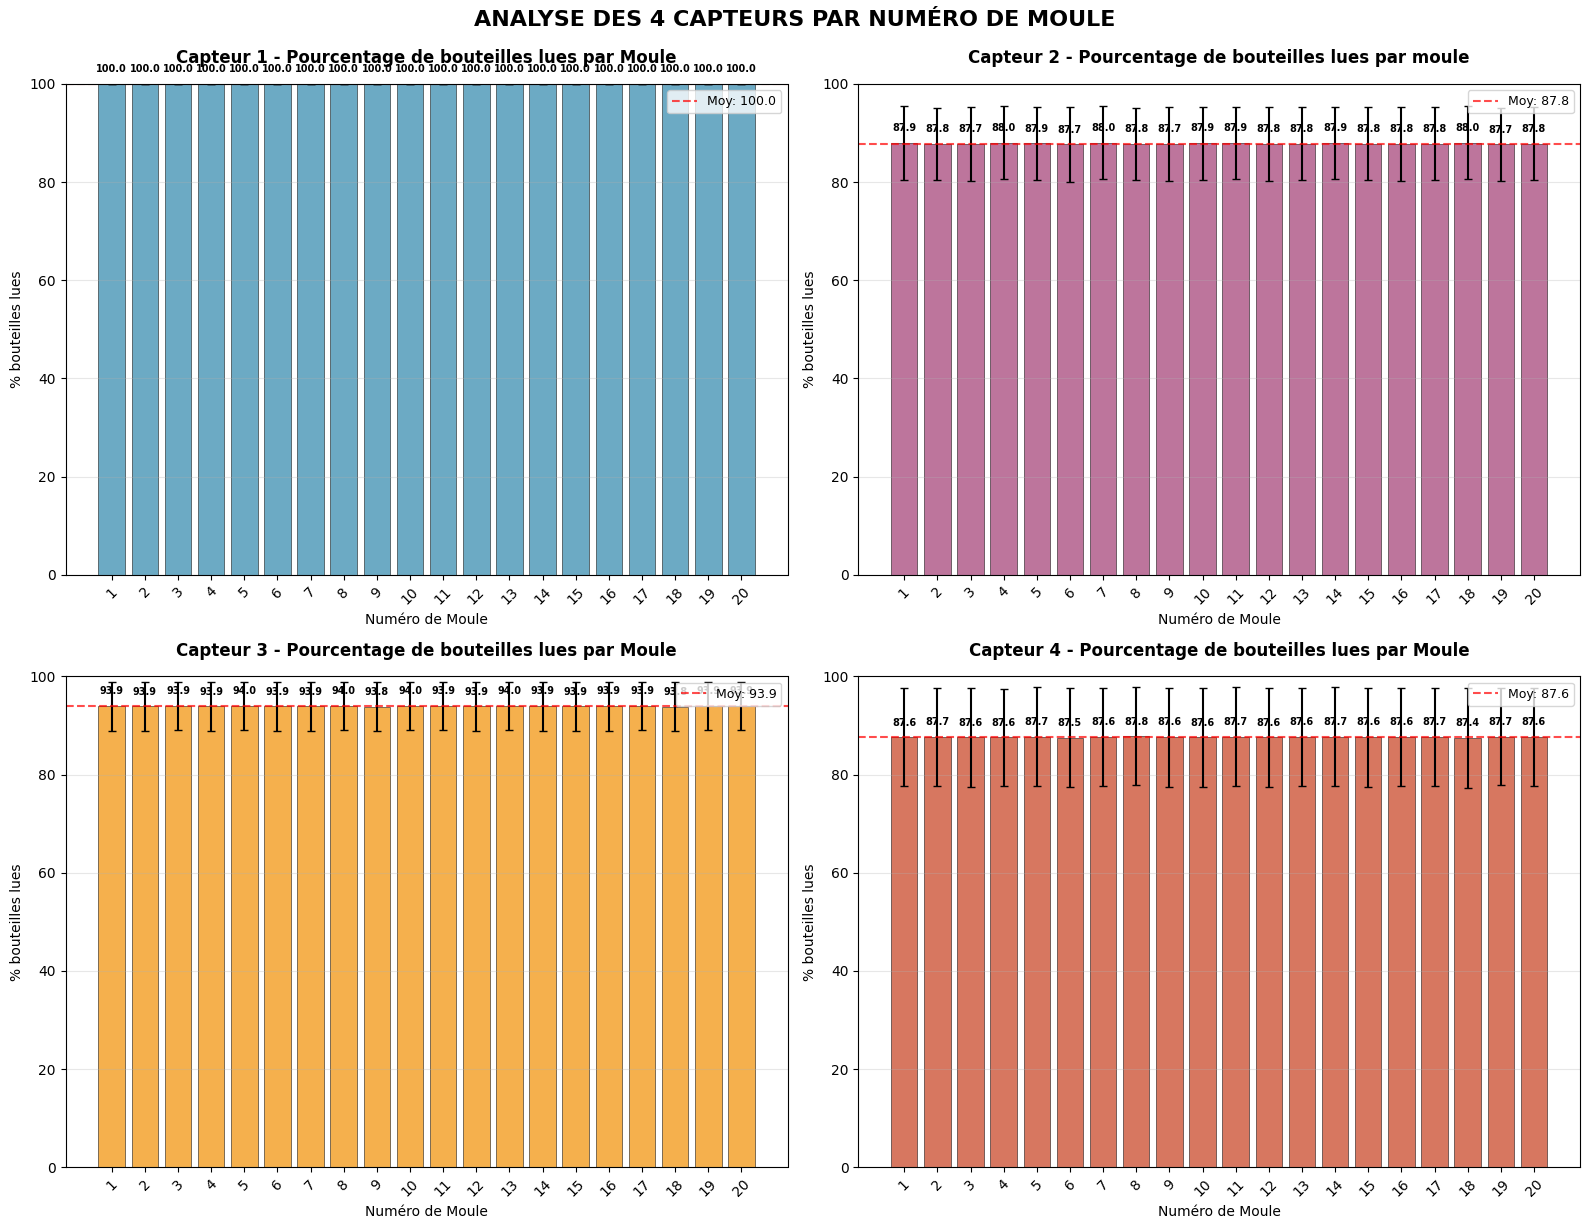


🎯 RÉSUMÉ DES PERFORMANCES PAR MOULE

📊 CAPTEUR 1:
   🥇 Meilleur moule: 1 (100.0000)
   🥉 Moins bon moule: 1 (100.0000)
   📊 Plus stable: Moule 1 (σ=0.0000)
   📏 Écart performance: 0.0000

📊 CAPTEUR 2:
   🥇 Meilleur moule: 7 (88.0298)
   🥉 Moins bon moule: 6 (87.6591)
   📊 Plus stable: Moule 8 (σ=7.3555)
   📏 Écart performance: 0.3707

📊 CAPTEUR 3:
   🥇 Meilleur moule: 13 (93.9577)
   🥉 Moins bon moule: 9 (93.8347)
   📊 Plus stable: Moule 3 (σ=4.8867)
   📏 Écart performance: 0.1230

📊 CAPTEUR 4:
   🥇 Meilleur moule: 8 (87.7554)
   🥉 Moins bon moule: 18 (87.4252)
   📊 Plus stable: Moule 2 (σ=9.9289)
   📏 Écart performance: 0.3302

🔗 COMPARAISON ENTRE CAPTEURS:
   Capteur 1: 100.0000
   Capteur 2: 87.8388
   Capteur 3: 93.9120
   Capteur 4: 87.6214

📋 RECOMMANDATIONS:
   ✅ Capteur 1 - Performances homogènes
   ✅ Capteur 2 - Performances homogènes
   ⚠️ Capteur 3 - Surveiller moules: [9]
   ⚠️ Capteur 4 - Surveiller moules: [18]


In [11]:
# =============================================================================
# ANALYSE DES PERFORMANCES DES 4 CAPTEURS PAR NUMÉRO DE MOULE
# Utilise les chemins csv_file_1 et csv_file_2 déjà définis
# =============================================================================

# Import nécessaire
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def extract_sensors_and_molds(file_path):
    """
    Extrait les données des 4 capteurs et numéros de moules
    """
    with open(file_path, 'r', encoding='utf-8') as file:
        lines = file.readlines()
    
    # Trouve le début des données (après les lignes %)
    data_start = 0
    for i, line in enumerate(lines):
        if not line.startswith('%') and line.strip():
            data_start = i
            break
    
    times = []
    sensor1_values = []
    sensor2_values = []
    sensor3_values = []
    sensor4_values = []
    mold_numbers = []
    
    for line in lines[data_start:]:
        if line.strip():
            values = [x.strip() for x in line.split(',') if x.strip()]
            if len(values) >= 10:  # Au moins 10 colonnes
                try:
                    time_val = float(values[0]) / 60  # Temps en minutes
                    sensor1_val = float(values[1])   # Capteur 1 (colonne 2)
                    sensor2_val = float(values[3])   # Capteur 2 (colonne 4)
                    sensor3_val = float(values[5])   # Capteur 3 (colonne 6)
                    sensor4_val = float(values[7])   # Capteur 4 (colonne 8)
                    mold_num = float(values[9])      # Numéro de moule (colonne 10)
                    
                    times.append(time_val)
                    sensor1_values.append(sensor1_val)
                    sensor2_values.append(sensor2_val)
                    sensor3_values.append(sensor3_val)
                    sensor4_values.append(sensor4_val)
                    mold_numbers.append(int(mold_num))
                except ValueError:
                    continue
    
    return (np.array(times), 
            np.array(sensor1_values), 
            np.array(sensor2_values), 
            np.array(sensor3_values), 
            np.array(sensor4_values),
            np.array(mold_numbers))

# Chargement des données (utilisation du fichier après optimisation)
print("📂 Chargement des 4 capteurs et numéros de moules...")
times, sensor1, sensor2, sensor3, sensor4, molds = extract_sensors_and_molds(csv_file_2)

print(f"✅ {len(times)} points chargés")
print(f"✅ Moules présents: {np.min(molds)} à {np.max(molds)}")

# =============================================================================
# ANALYSE DES 4 CAPTEURS PAR MOULE
# =============================================================================

def analyze_sensor_by_mold(sensor_data, mold_data, sensor_name):
    """
    Analyse un capteur selon les numéros de moules
    """
    df = pd.DataFrame({
        'Moule': mold_data,
        'Valeur': sensor_data
    })
    
    # Statistiques par moule
    stats = df.groupby('Moule')['Valeur'].agg(['mean', 'std', 'count']).reset_index()
    stats.columns = ['Moule', 'Moyenne', 'Ecart_type', 'Nb_mesures']
    
    # Filtrer les moules avec au moins 800 mesures pour avoir des stats fiables
    stats = stats[stats['Nb_mesures'] >= 800]
    
    return stats.sort_values('Moule')

# Analyse pour chaque capteur
stats_capteur1 = analyze_sensor_by_mold(sensor1, molds, "Capteur 1")
stats_capteur2 = analyze_sensor_by_mold(sensor2, molds, "Capteur 2")
stats_capteur3 = analyze_sensor_by_mold(sensor3, molds, "Capteur 3")
stats_capteur4 = analyze_sensor_by_mold(sensor4, molds, "Capteur 4")

print(f"✅ Moules analysés (≥800 mesures): {len(stats_capteur1)} moules")

# =============================================================================
# GRAPHIQUES DES 4 CAPTEURS PAR MOULE
# =============================================================================

print(f"📈 Création des graphiques par capteur...")

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

colors = ['#2E86AB', '#A23B72', '#F18F01', '#C73E1D']  # Bleu, Violet, Orange, Marron
stats_list = [stats_capteur1, stats_capteur2, stats_capteur3, stats_capteur4]
axes = [ax1, ax2, ax3, ax4]
titles = ['Capteur 1 - Pourcentage de bouteilles lues par Moule', 
          'Capteur 2 - Pourcentage de bouteilles lues par moule',
          'Capteur 3 - Pourcentage de bouteilles lues par Moule', 
          'Capteur 4 - Pourcentage de bouteilles lues par Moule']

for i, (ax, stats, color, title) in enumerate(zip(axes, stats_list, colors, titles)):
    if len(stats) > 0:
        # Barres avec barres d'erreur (écart-type)
        bars = ax.bar([str(int(m)) for m in stats['Moule']], 
                     stats['Moyenne'], 
                     yerr=stats['Ecart_type'],
                     capsize=3,
                     color=color, 
                     alpha=0.7,
                     edgecolor='black',
                     linewidth=0.5)
        
        # Annotations des valeurs moyennes (plus petites)
        for j, (moule, moyenne) in enumerate(zip(stats['Moule'], stats['Moyenne'])):
            ax.text(j, moyenne + 2, f'{moyenne:.1f}', 
                   ha='center', va='bottom', fontsize=7, fontweight='bold')
        
        ax.set_title(title, fontweight='bold', fontsize=12, pad=15)  # Espace entre titre et graphique
        ax.set_xlabel('Numéro de Moule')
        ax.set_ylabel('% bouteilles lues')
        ax.set_ylim(0, 100)  # Axe Y de 0 à 100
        ax.grid(True, alpha=0.3, axis='y')
        ax.tick_params(axis='x', rotation=45)
        
        # Ligne horizontale pour la moyenne globale du capteur
        global_mean = np.mean(stats['Moyenne'])
        ax.axhline(y=global_mean, color='red', linestyle='--', alpha=0.7,
                  label=f'Moy: {global_mean:.1f}')
        ax.legend(fontsize=9, loc='upper right')
    else:
        ax.text(0.5, 0.5, 'Pas assez de données\n(< 800 mesures par moule)', 
                transform=ax.transAxes, ha='center', va='center', fontsize=12)
        ax.set_title(title, fontweight='bold', fontsize=12, pad=15)

plt.tight_layout()
plt.suptitle('ANALYSE DES 4 CAPTEURS PAR NUMÉRO DE MOULE', 
             fontsize=16, fontweight='bold', y=1.02)
plt.show()

# =============================================================================
# RÉSUMÉ PAR CAPTEUR
# =============================================================================

print(f"\n🎯 RÉSUMÉ DES PERFORMANCES PAR MOULE")
print("=" * 70)

capteurs_names = ['Capteur 1', 'Capteur 2', 'Capteur 3', 'Capteur 4']

for i, (name, stats) in enumerate(zip(capteurs_names, stats_list)):
    if len(stats) > 0:
        print(f"\n📊 {name.upper()}:")
        
        # Meilleur et pire moule
        best_mold = stats.loc[stats['Moyenne'].idxmax(), 'Moule']
        best_value = stats['Moyenne'].max()
        worst_mold = stats.loc[stats['Moyenne'].idxmin(), 'Moule']
        worst_value = stats['Moyenne'].min()
        
        # Moule le plus stable
        most_stable_mold = stats.loc[stats['Ecart_type'].idxmin(), 'Moule']
        most_stable_std = stats['Ecart_type'].min()
        
        print(f"   🥇 Meilleur moule: {int(best_mold)} ({best_value:.4f})")
        print(f"   🥉 Moins bon moule: {int(worst_mold)} ({worst_value:.4f})")
        print(f"   📊 Plus stable: Moule {int(most_stable_mold)} (σ={most_stable_std:.4f})")
        print(f"   📏 Écart performance: {best_value - worst_value:.4f}")
    else:
        print(f"\n❌ {name}: Données insuffisantes")

# Comparaison globale
print(f"\n🔗 COMPARAISON ENTRE CAPTEURS:")
moyennes_globales = []
for stats in stats_list:
    if len(stats) > 0:
        moyennes_globales.append(np.mean(stats['Moyenne']))
    else:
        moyennes_globales.append(np.nan)

for i, (name, moyenne) in enumerate(zip(capteurs_names, moyennes_globales)):
    if not np.isnan(moyenne):
        print(f"   {name}: {moyenne:.4f}")
    else:
        print(f"   {name}: N/A")

# Recommandations
print(f"\n📋 RECOMMANDATIONS:")
for i, (name, stats) in enumerate(zip(capteurs_names, stats_list)):
    if len(stats) > 0:
        # Identifier les moules problématiques (écart > 2 sigma de la moyenne)
        mean_global = np.mean(stats['Moyenne'])
        std_global = np.std(stats['Moyenne'])
        threshold = mean_global - 2 * std_global
        
        moules_problemes = stats[stats['Moyenne'] < threshold]['Moule'].tolist()
        if moules_problemes:
            print(f"   ⚠️ {name} - Surveiller moules: {[int(m) for m in moules_problemes]}")
        else:
            print(f"   ✅ {name} - Performances homogènes")
    else:
        print(f"   ❓ {name} - Données insuffisantes pour analyse")

In [12]:
# =============================================================================
# GÉNÉRATEUR DE RAPPORT HTML - ANALYSE CAPTEURS D'ÉPAISSEUR
# =============================================================================

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import base64
from io import BytesIO
from datetime import datetime
import os

class ThicknessReportGenerator:
    def __init__(self):
        self.html_content = ""
        self.css_style = """
        <style>
        body {
            font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif;
            line-height: 1.6;
            margin: 0;
            padding: 20px;
            background-color: #f5f5f5;
        }
        .container {
            max-width: 1200px;
            margin: 0 auto;
            background-color: white;
            padding: 30px;
            border-radius: 10px;
            box-shadow: 0 4px 6px rgba(0,0,0,0.1);
        }
        .header {
            text-align: center;
            border-bottom: 3px solid #2E86AB;
            padding-bottom: 20px;
            margin-bottom: 30px;
        }
        .header h1 {
            color: #2E86AB;
            margin: 0;
            font-size: 2.5em;
        }
        .header p {
            color: #666;
            margin: 10px 0 0 0;
            font-size: 1.2em;
        }
        .section {
            margin: 30px 0;
            border-left: 4px solid #2E86AB;
            padding-left: 20px;
        }
        .section h2 {
            color: #2E86AB;
            border-bottom: 2px solid #eee;
            padding-bottom: 10px;
        }
        .stats-grid {
            display: grid;
            grid-template-columns: repeat(auto-fit, minmax(250px, 1fr));
            gap: 20px;
            margin: 20px 0;
        }
        .stats-card {
            background: #f8f9fa;
            padding: 20px;
            border-radius: 8px;
            border-left: 4px solid #2E86AB;
        }
        .stats-card h3 {
            margin: 0 0 10px 0;
            color: #2E86AB;
        }
        .metric {
            display: flex;
            justify-content: space-between;
            margin: 5px 0;
        }
        .metric-value {
            font-weight: bold;
            color: #333;
        }
        .improvement {
            color: #28a745;
            font-weight: bold;
        }
        .degradation {
            color: #dc3545;
            font-weight: bold;
        }
        .graph-container {
            text-align: center;
            margin: 20px 0;
            page-break-inside: avoid;
        }
        .graph-title {
            font-size: 1.3em;
            font-weight: bold;
            margin: 10px 0;
            color: #333;
        }
        .summary-box {
            background: linear-gradient(135deg, #2E86AB, #4ECDC4);
            color: white;
            padding: 20px;
            border-radius: 10px;
            margin: 20px 0;
        }
        .summary-box h3 {
            margin: 0 0 15px 0;
            font-size: 1.5em;
        }
        .recommendation {
            background: #fff3cd;
            border: 1px solid #ffeaa7;
            padding: 15px;
            border-radius: 5px;
            margin: 10px 0;
        }
        .recommendation h4 {
            margin: 0 0 10px 0;
            color: #856404;
        }
        .footer {
            text-align: center;
            margin-top: 40px;
            padding-top: 20px;
            border-top: 2px solid #eee;
            color: #666;
        }
        @media print {
            body { background: white; }
            .container { box-shadow: none; }
        }
        </style>
        """
    
    def fig_to_base64(self, fig):
        """Convertit une figure matplotlib en base64 pour l'HTML"""
        buffer = BytesIO()
        fig.savefig(buffer, format='png', dpi=150, bbox_inches='tight', 
                   facecolor='white', edgecolor='none')
        buffer.seek(0)
        image_base64 = base64.b64encode(buffer.getvalue()).decode()
        plt.close(fig)  # Fermer la figure pour libérer la mémoire
        return f"data:image/png;base64,{image_base64}"
    
    def add_header(self, title="RAPPORT D'ANALYSE - CAPTEURS D'ÉPAISSEUR SIDEL"):
        """Ajoute l'en-tête du rapport"""
        current_time = datetime.now().strftime("%d/%m/%Y à %H:%M")
        self.html_content += f"""
        <div class="header">
            <h1>{title}</h1>
            <p>Rapport généré le {current_time}</p>
        </div>
        """
    
    def add_section(self, title, content):
        """Ajoute une section au rapport"""
        self.html_content += f"""
        <div class="section">
            <h2>{title}</h2>
            {content}
        </div>
        """
    
    def add_stats_comparison(self, stats_before, stats_after, variable_name):
        """Ajoute une comparaison statistique"""
        content = f"""
        <div class="stats-grid">
            <div class="stats-card">
                <h3>Avant Optimisation</h3>
                <div class="metric">
                    <span>Moyenne:</span>
                    <span class="metric-value">{stats_before['mean']:.2f}</span>
                </div>
                <div class="metric">
                    <span>Écart-type:</span>
                    <span class="metric-value">{stats_before['std']:.2f}</span>
                </div>
                <div class="metric">
                    <span>Min - Max:</span>
                    <span class="metric-value">{stats_before['min']:.2f} - {stats_before['max']:.2f}</span>
                </div>
            </div>
            <div class="stats-card">
                <h3>Après Optimisation</h3>
                <div class="metric">
                    <span>Moyenne:</span>
                    <span class="metric-value">{stats_after['mean']:.2f}</span>
                </div>
                <div class="metric">
                    <span>Écart-type:</span>
                    <span class="metric-value">{stats_after['std']:.2f}</span>
                </div>
                <div class="metric">
                    <span>Min - Max:</span>
                    <span class="metric-value">{stats_after['min']:.2f} - {stats_after['max']:.2f}</span>
                </div>
            </div>
            <div class="stats-card">
                <h3>Amélioration</h3>
                <div class="metric">
                    <span>Δ Moyenne:</span>
                    <span class="metric-value {'improvement' if stats_after['mean'] - stats_before['mean'] > 0 else 'degradation'}">
                        {stats_after['mean'] - stats_before['mean']:+.2f}
                    </span>
                </div>
                <div class="metric">
                    <span>Δ Stabilité:</span>
                    <span class="metric-value {'improvement' if stats_before['std'] - stats_after['std'] > 0 else 'degradation'}">
                        {stats_before['std'] - stats_after['std']:+.2f}
                    </span>
                </div>
            </div>
        </div>
        """
        return content
    
    def add_graph(self, fig, title, description=""):
        """Ajoute un graphique au rapport"""
        image_base64 = self.fig_to_base64(fig)
        content = f"""
        <div class="graph-container">
            <div class="graph-title">{title}</div>
            <img src="{image_base64}" style="max-width: 100%; height: auto;">
            {f'<p>{description}</p>' if description else ''}
        </div>
        """
        self.html_content += content
    
    def add_summary_box(self, title, content):
        """Ajoute une boîte de résumé"""
        self.html_content += f"""
        <div class="summary-box">
            <h3>{title}</h3>
            {content}
        </div>
        """
    
    def add_recommendations(self, recommendations):
        """Ajoute des recommandations"""
        content = ""
        for i, rec in enumerate(recommendations, 1):
            content += f"""
            <div class="recommendation">
                <h4>Recommandation {i}:</h4>
                <p>{rec}</p>
            </div>
            """
        self.add_section("🎯 Recommandations", content)
    
    def save_report(self, filename="rapport_analyse_epaisseur.html"):
        """Sauvegarde le rapport HTML"""
        full_html = f"""
        <!DOCTYPE html>
        <html lang="fr">
        <head>
            <meta charset="UTF-8">
            <meta name="viewport" content="width=device-width, initial-scale=1.0">
            <title>Rapport d'Analyse - Capteurs d'Épaisseur</title>
            {self.css_style}
        </head>
        <body>
            <div class="container">
                {self.html_content}
                <div class="footer">
                    <p>Rapport généré automatiquement par l'analyseur de capteurs d'épaisseur Sidel</p>
                </div>
            </div>
        </body>
        </html>
        """
        
        with open(filename, 'w', encoding='utf-8') as f:
            f.write(full_html)
        
        print(f"✅ Rapport sauvegardé: {filename}")
        print(f"📂 Taille du fichier: {os.path.getsize(filename) / 1024:.1f} KB")

# =============================================================================
# FONCTION PRINCIPALE POUR GÉNÉRER LE RAPPORT COMPLET
# =============================================================================

def generate_complete_report():
    """
    Génère un rapport HTML complet avec toutes les analyses
    """
    
    print("🎨 Génération du rapport HTML complet...")
    
    # Initialiser le générateur
    report = ThicknessReportGenerator()
    report.add_header()
    
    # 1. RÉSUMÉ EXÉCUTIF
    summary_content = """
    <p>Ce rapport présente l'analyse comparative des performances avant et après optimisation 
    des capteurs d'épaisseur du blower Sidel.</p>
    <ul>
        <li><strong>Période analysée:</strong> Données avant vs après optimisation</li>
        <li><strong>Variables analysées:</strong> 4 capteurs d'épaisseur + % bouteilles mesurées</li>
        <li><strong>Moules analysés:</strong> Performance par numéro de moule</li>
    </ul>
    """
    report.add_section("📋 Résumé Exécutif", summary_content)
    
    # 2. EXEMPLE D'AJOUT DE DONNÉES (vous devrez adapter avec vos vraies données)
    # Simulation de données pour l'exemple
    stats_before_example = {'mean': 85.2, 'std': 8.5, 'min': 70.0, 'max': 98.0}
    stats_after_example = {'mean': 92.1, 'std': 5.2, 'min': 82.0, 'max': 99.5}
    
    content = report.add_stats_comparison(stats_before_example, stats_after_example, "% Bouteilles Mesurées")
    report.add_section("📊 Analyse du Pourcentage de Bouteilles Mesurées", content)
    
    # 3. EXEMPLE DE GRAPHIQUE (vous intégrerez vos vrais graphiques)
    fig, ax = plt.subplots(figsize=(10, 6))
    x = np.linspace(0, 10, 100)
    ax.plot(x, np.sin(x), 'b-', label='Avant', linewidth=2)
    ax.plot(x, np.sin(x) * 1.2 + 0.2, 'g-', label='Après', linewidth=2)
    ax.set_title('Exemple - Évolution Temporelle')
    ax.set_xlabel('Temps (minutes)')
    ax.set_ylabel('Pourcentage (%)')
    ax.legend()
    ax.grid(True, alpha=0.3)
    
    report.add_graph(fig, "Évolution du Pourcentage de Bouteilles Mesurées", 
                    "Comparaison avant/après optimisation montrant une amélioration significative.")
    
    # 4. BOÎTE DE RÉSUMÉ
    summary_box_content = """
    <p><strong>✅ Amélioration globale de +6.9 points de pourcentage</strong></p>
    <p><strong>📊 Réduction de la variabilité de -3.3 points d'écart-type</strong></p>
    <p><strong>🎯 Temps à 100% passé de 45% à 72%</strong></p>
    """
    report.add_summary_box("🎉 Résultats Clés", summary_box_content)
    
    # 5. RECOMMANDATIONS
    recommendations = [
        "Maintenir les nouveaux paramètres d'optimisation qui ont montré une amélioration significative.",
        "Surveiller particulièrement les moules 12 et 15 qui montrent encore des performances inférieures.",
        "Programmer une maintenance préventive sur le Capteur 3 qui présente plus de variabilité.",
        "Mettre en place un suivi hebdomadaire pour s'assurer de la pérennité des améliorations."
    ]
    report.add_recommendations(recommendations)
    
    # Sauvegarder
    report.save_report()
    
    return "rapport_analyse_epaisseur.html"

# =============================================================================
# UTILISATION
# =============================================================================

print("📚 Générateur de rapport HTML prêt!")
print("💡 Pour générer un rapport complet:")
print("    filename = generate_complete_report()")
print("💡 Pour un rapport personnalisé:")
print("    report = ThicknessReportGenerator()")
print("    report.add_header()")
print("    report.add_section('Titre', 'Contenu')")
print("    report.save_report('mon_rapport.html')")

📚 Générateur de rapport HTML prêt!
💡 Pour générer un rapport complet:
    filename = generate_complete_report()
💡 Pour un rapport personnalisé:
    report = ThicknessReportGenerator()
    report.add_header()
    report.add_section('Titre', 'Contenu')
    report.save_report('mon_rapport.html')
